목표 설정
- 하이퍼 익스프레스로 각인 3레벨 5개를 지원해주었음
- 하지만 1540 이상으로 올라가기 시작하면 3레벨 5개 1레벨 1개, 즉 고대 세팅으로 전환해야 취업률이 올라간다.
- 하지만 직업 각인의 물량을 풀어준 것은 유물 구간으로 고대 구간은 패치가 없어 하이퍼 익스프레스로 유입된 유저가 맞추기에는 부담스러운 가격이다.
- 그렇기에 악세가 쌀 때 사는 것이 중요한 데 이전에 아래의 그림과 같은 표가 나온 적이 있다.

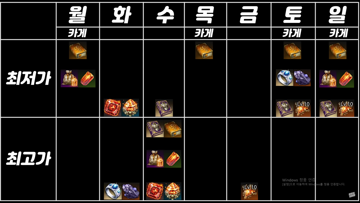

- 보면 악세는 토요일에 가장 싸고, 화요일에 가장 비싸다고 되어 있다.
- 이것 그림이 아직도 유효한지 확인하고, 아니라면 가장 싼 시간대는 언제인지 확인한다.
- 이때 평균 값으로 확인하게 될 텐데 직업 각인이 포함된 악세와 일반 악세의 가격 차이가 유의미하게나기 때문에 분리하여 분석할 필요가 있다.
- 또한 각인의 경우 대부분의 직업이 사용하는 각인이 있고 소수의 직업만이 사용하는 각인이 있어 일반 각인 중에서도 나눌 필요가 있어보인다.
- 이는 이전에 정리해둔 직업별 채용 각인에서 각인 채용 빈도수를 기반으로 새로운 feature를 만드는 것을 고려해도 괜찮을 것 같다.
- 또한 아래를 보면 outlier가 존재하여 이를 제거해야 할 필요성이 있다.

In [56]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [125]:
# 한글 폰트
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = mpl.font_manager.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [3]:
df = pd.read_csv('Preprocessed_Auction_Data.csv')

In [4]:
df.head()

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave
0,2023-09-20 15:18,귀걸이,85,12000.00,2,특화,291,-,0,방어력 감소,2,역천지체,5,원한,3,1
1,2023-09-20 15:18,귀걸이,90,15000.00,2,특화,294,-,0,방어력 감소,1,역천지체,5,원한,3,1
2,2023-09-20 15:18,귀걸이,85,33333.00,2,특화,291,-,0,방어력 감소,1,역천지체,6,원한,3,1
3,2023-09-20 15:18,귀걸이,90,50000.00,1,특화,294,-,0,이동속도 감소,3,역천지체,6,원한,3,1
4,2023-09-20 15:18,반지,100,8000.00,2,치명,200,-,0,이동속도 감소,2,원한,6,역천지체,3,1


In [5]:
df.describe()

,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave
count,3687592.00,3658835.00,3687592.00,3687592.00,3687592.00,3687592.00,3687592.00,3687592.00,3687592.00
mean,91.10,23028.17,1.85,300.82,110.33,2.11,4.98,2.99,0.41
std,4.77,59183.14,0.41,110.36,204.62,0.82,0.79,0.11,0.49
min,85.00,1.00,0.00,194.00,0.00,1.00,3.00,1.00,0.00
25%,87.00,150.00,2.00,198.00,0.00,1.00,4.00,3.00,0.00
50%,90.00,1500.00,2.00,293.00,0.00,2.00,5.00,3.00,0.00
75%,95.00,20000.00,2.00,300.00,0.00,3.00,6.00,3.00,1.00
max,100.00,10000000.00,2.00,500.00,500.00,6.00,6.00,3.00,1.00


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# 시간 관련 데이터 추출
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.dayofweek

In [8]:
df.head()

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
0,2023-09-20 15:18:00,귀걸이,85,12000.00,2,특화,291,-,0,방어력 감소,2,역천지체,5,원한,3,1,20,15,2
1,2023-09-20 15:18:00,귀걸이,90,15000.00,2,특화,294,-,0,방어력 감소,1,역천지체,5,원한,3,1,20,15,2
2,2023-09-20 15:18:00,귀걸이,85,33333.00,2,특화,291,-,0,방어력 감소,1,역천지체,6,원한,3,1,20,15,2
3,2023-09-20 15:18:00,귀걸이,90,50000.00,1,특화,294,-,0,이동속도 감소,3,역천지체,6,원한,3,1,20,15,2
4,2023-09-20 15:18:00,반지,100,8000.00,2,치명,200,-,0,이동속도 감소,2,원한,6,역천지체,3,1,20,15,2


### 직업 각인 포함 여부로 데이터프레임 분리

In [9]:
df_normal = df[df['ClassEngrave']==0].reset_index(drop=True)
df_class = df[df['ClassEngrave']==1].reset_index(drop=True)

### Outlier 확인 및 처리

In [10]:
df_normal.describe()

,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
count,2183007.00,2162433.00,2183007.00,2183007.00,2183007.00,2183007.00,2183007.00,2183007.00,2183007.00,2183007.00,2183007.00,2183007.00
mean,90.58,6040.93,1.90,322.99,155.82,2.12,4.83,3.00,0.00,19.56,11.58,3.04
std,4.46,16443.33,0.34,120.23,228.03,0.82,0.76,0.07,0.00,10.31,7.02,2.03
min,85.00,1.00,0.00,194.00,0.00,1.00,3.00,1.00,0.00,1.00,0.00,0.00
25%,87.00,100.00,2.00,198.00,0.00,1.00,4.00,3.00,0.00,20.00,5.00,1.00
50%,90.00,200.00,2.00,294.00,0.00,2.00,5.00,3.00,0.00,24.00,12.00,3.00
75%,94.00,1000.00,2.00,482.00,483.00,3.00,5.00,3.00,0.00,27.00,18.00,5.00
max,100.00,750000.00,2.00,500.00,500.00,6.00,6.00,3.00,0.00,30.00,23.00,6.00


In [11]:
df_class.describe()

,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
count,1504585.00,1496402.00,1504585.00,1504585.00,1504585.00,1504585.00,1504585.00,1504585.00,1504585.00,1504585.00,1504585.00,1504585.00
mean,91.87,47576.24,1.78,268.65,44.33,2.10,5.21,2.99,1.00,19.45,11.58,3.04
std,5.10,84580.95,0.49,84.43,140.76,0.82,0.76,0.14,0.00,10.39,7.02,2.04
min,85.00,1.00,0.00,194.00,0.00,1.00,4.00,1.00,1.00,1.00,0.00,0.00
25%,87.00,4444.00,2.00,197.00,0.00,1.00,5.00,3.00,1.00,4.00,5.00,1.00
50%,91.00,15000.00,2.00,291.00,0.00,2.00,5.00,3.00,1.00,24.00,12.00,3.00
75%,96.00,60000.00,2.00,297.00,0.00,3.00,6.00,3.00,1.00,27.00,18.00,5.00
max,100.00,10000000.00,2.00,500.00,500.00,3.00,6.00,3.00,1.00,30.00,23.00,6.00


df_normal과 df_class 모두 75%와 max 사이에 큰 차이가 존재하는 것을 확인할 수 있다.

이어서 IQR을 이용해 Outlier 행을 확인한다.

In [12]:
q1 = df_normal['BuyPrice'].quantile(0.25)
q3 = df_normal['BuyPrice'].quantile(0.75)
iqr = q3 - q1

condition = df_normal['BuyPrice'] > q3 + 1.5 * iqr
df_normal[condition].head()

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
1,2023-09-20 15:18:00,목걸이,88,13000.00,1,특화,493,치명,483,이동속도 감소,2,타격의 대가,6,속전속결,3,0,20,15,2
2,2023-09-20 15:18:00,목걸이,89,14000.00,2,특화,479,치명,499,공격속도 감소,3,속전속결,5,타격의 대가,3,0,20,15,2
3,2023-09-20 15:18:00,목걸이,87,15000.00,2,특화,477,치명,497,방어력 감소,2,타격의 대가,4,속전속결,3,0,20,15,2
4,2023-09-20 15:18:00,목걸이,93,18000.00,1,특화,491,치명,495,방어력 감소,3,속전속결,4,타격의 대가,3,0,20,15,2
5,2023-09-20 15:18:00,목걸이,93,19000.00,2,특화,490,치명,497,공격속도 감소,1,속전속결,4,타격의 대가,3,0,20,15,2


In [13]:
q1 = df_class['BuyPrice'].quantile(0.25)
q3 = df_class['BuyPrice'].quantile(0.75)
iqr = q3 - q1

condition = df_class['BuyPrice'] > q3 + 1.5 * iqr
df_class[condition].head()

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
8,2023-09-20 15:18:00,반지,85,160000.00,2,특화,194,-,0,공격력 감소,1,원한,6,역천지체,3,1,20,15,2
9,2023-09-20 15:18:00,반지,97,320000.00,2,특화,199,-,0,공격속도 감소,3,원한,6,역천지체,3,1,20,15,2
11,2023-09-20 15:18:00,귀걸이,90,150000.00,2,치명,294,-,0,이동속도 감소,2,아드레날린,4,화력 강화,3,1,20,15,2
12,2023-09-20 15:18:00,귀걸이,100,300000.00,2,치명,300,-,0,공격속도 감소,3,아드레날린,4,화력 강화,3,1,20,15,2
13,2023-09-20 15:18:00,귀걸이,100,400000.00,2,치명,300,-,0,방어력 감소,1,아드레날린,6,화력 강화,3,1,20,15,2


확인한 결과 iqr 상으로는 Outlier에 해당하나 옵션 상으로 보았을 때 가격이 비쌀만한 매물들도 많이 보인다.

그래서 생각한 두가지 방법이 있다.
1. 옵션으로 그룹화하여 IQR을 다시 시도
2. 80%나 90% 이상인 데이터를 제거

먼저 간단하게 해볼 수 있는 2번 방법을 시도한다.

In [14]:
condition = df_normal['BuyPrice'] > df_normal['BuyPrice'].quantile(0.9)
df_normal[condition].head()

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
8,2023-09-20 15:18:00,목걸이,92,26500.00,2,특화,499,치명,486,공격속도 감소,3,속전속결,5,타격의 대가,3,0,20,15,2
9,2023-09-20 15:18:00,목걸이,89,28000.00,2,특화,483,치명,496,공격력 감소,2,타격의 대가,4,속전속결,3,0,20,15,2
99,2023-09-20 15:18:00,목걸이,90,30000.00,1,특화,497,치명,483,공격속도 감소,3,속전속결,5,예리한 둔기,3,0,20,15,2
178,2023-09-20 15:18:00,목걸이,97,25000.00,1,신속,499,치명,495,방어력 감소,1,전문의,6,구슬동자,3,0,20,15,2
182,2023-09-20 15:18:00,목걸이,86,28282.00,2,신속,485,특화,488,방어력 감소,2,전문의,5,구슬동자,3,0,20,15,2


In [15]:
condition = df_class['BuyPrice'] > df_class['BuyPrice'].quantile(0.9)
df_class[condition].head()

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
8,2023-09-20 15:18:00,반지,85,160000.00,2,특화,194,-,0,공격력 감소,1,원한,6,역천지체,3,1,20,15,2
9,2023-09-20 15:18:00,반지,97,320000.00,2,특화,199,-,0,공격속도 감소,3,원한,6,역천지체,3,1,20,15,2
11,2023-09-20 15:18:00,귀걸이,90,150000.00,2,치명,294,-,0,이동속도 감소,2,아드레날린,4,화력 강화,3,1,20,15,2
12,2023-09-20 15:18:00,귀걸이,100,300000.00,2,치명,300,-,0,공격속도 감소,3,아드레날린,4,화력 강화,3,1,20,15,2
13,2023-09-20 15:18:00,귀걸이,100,400000.00,2,치명,300,-,0,방어력 감소,1,아드레날린,6,화력 강화,3,1,20,15,2


결과가 IQR을 사용했 던 것과 비슷한 것을 확인할 수 있어 1번 방법을 시도한다.

우선 유효성을 확인하기 위해 하나의 조합으로 시도한다. (원한, 역천)

In [16]:
condition = (df['FirstEngraveName']=="원한") & (df['FirstEngraveValue']==6) & (df['SecondEngraveName']=="역천지체") & (df['SecondEngraveValue']) & (df['FirstStatName']=='특화')

tmp = df[condition]
tmp.head()

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
8,2023-09-20 15:18:00,반지,85,160000.00,2,특화,194,-,0,공격력 감소,1,원한,6,역천지체,3,1,20,15,2
9,2023-09-20 15:18:00,반지,97,320000.00,2,특화,199,-,0,공격속도 감소,3,원한,6,역천지체,3,1,20,15,2
17253,2023-09-20 16:00:00,귀걸이,93,250000.00,1,특화,296,-,0,공격속도 감소,1,원한,6,역천지체,3,1,20,16,2
17258,2023-09-20 16:00:00,반지,85,160000.00,2,특화,194,-,0,공격력 감소,1,원한,6,역천지체,3,1,20,16,2
17259,2023-09-20 16:00:00,반지,97,320000.00,2,특화,199,-,0,공격속도 감소,3,원한,6,역천지체,3,1,20,16,2


In [17]:
tmp.tail()

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
3666873,2023-10-04 09:00:00,반지,100,600000.00,2,특화,200,-,0,공격속도 감소,2,원한,6,역천지체,3,1,4,9,2
3681293,2023-10-04 10:00:00,귀걸이,90,270000.00,2,특화,294,-,0,공격력 감소,3,원한,6,역천지체,3,1,4,10,2
3681300,2023-10-04 10:00:00,반지,85,155000.00,2,특화,194,-,0,공격력 감소,1,원한,6,역천지체,3,1,4,10,2
3681301,2023-10-04 10:00:00,반지,90,194999.00,1,특화,196,-,0,공격력 감소,3,원한,6,역천지체,3,1,4,10,2
3681302,2023-10-04 10:00:00,반지,100,600000.00,2,특화,200,-,0,공격속도 감소,2,원한,6,역천지체,3,1,4,10,2


지금 확인한 결과 모든 조합에 대해 치명, 특화, 신속을 수집해서 직업 각인의 경우 사용하지 않는 스탯이 포함되어 낮은 가격으로 집계되는 것으로 확인 된다.

여기서 사용하지 않는 스탯을 제거하는 작업이 필요할 것 같다.

아래는 이전에 정리해 둔 직업별 각인이다.

- 전태: ['원한', '바리케이드', '안정된 상태', '예리한 둔기', '아드레날린', '전투 태세'],
- 고기: ['원한', '슈퍼 차지', '고독한 기사', '결투의 대가', '저주받은 인형', '전투 태세'],   
- 비기: ['원한', '예리한 둔기', '돌격대장', '질량 증가', '광전사의 비기', '에테르 포식자'],   
- 광기: ['원한', '예리한 둔기', '돌격대장', '달인의 저력', '광기', '에테르 포식자'] ,      
- 중수: ['원한', '바리케이드', '중력 수련', '정기 흡수', '결투의 대가', '분노의 망치'],     
- 분망: ['원한', '슈퍼 차지', '바리케이드', '분노의 망치', '결투의 대가', '아드레날린'],     
- 포식: ['원한', '기습의 대가', '돌격대장', '질량 증가', '포식자', '아드레날린'],         
- 처단: ['원한', '기습의 대가', '돌격대장', '저주받은 인형', '처단자', '아드레날린'],       
- 상소: ['원한', '상급 소환사', '예리한 둔기', '타격의 대가', '저주받은 인형', '아드레날린'],  
- 교감: ['원한', '예리한 둔기', '아드레날린', '돌격대장', '넘치는 교감', '에테르 포식자'],    
- 황후: ['원한', '아드레날린', '저주받은 인형', '돌격대장', '타격의 대가', '황후의 은총'],    
- 황제: ['원한', '황제의 칙령', '돌격대장', '질량 증가', '타격의 대가', '아드레날린'],      
- 점화: ['원한', '점화', '속전속결', '타격의 대가', '아드레날린', '에테르 포식자'],        
- 환류: ['원한', '환류', '예리한 둔기', '타격의 대가', '저주받은 인형', '아드레날린'],      
- 초심: ['원한', '예리한 둔기', '돌격대장', '질량 증가', '초심', '각성'],             
- 오의: ['원한', '예리한 둔기', '돌격대장', '저주받은 인형', '아드레날린', '오의 강화'],     
- 체술: ['원한', '극의: 체술', '기습의 대가', '예리한 둔기', '돌격대장', '아드레날린'],     
- 충단: ['원한', '예리한 둔기', '기습의 대가', '저주받은 인형', '충격 단련', '아드레날린'],   
- 세맥: ['원한', '예리한 둔기', '돌격대장', '질량 증가', '아드레날린', '세맥타통'],        
- 역천: ['원한', '예리한 둔기', '저주받은 인형', '아드레날린', '역천지체', '각성'],        
- 절정: ['원한', '절정', '돌격대장', '기습의 대가', '저주받은 인형', '아드레날린'],        
- 절제: ['원한', '절제', '돌격대장', '기습의 대가', '저주받은 인형', '아드레날린'],        
- 일격: ['원한', '기습의 대가', '예리한 둔기', '저주받은 인형', '일격필살', '아드레날린'],    
- 난무: ['원한', '기습의 대가', '예리한 둔기', '오의난무', '저주받은 인형', '아드레날린'],    
- 강무: ['원한', '예리한 둔기', '저주받은 인형', '기습의 대가', '아드레날린', '강화 무기'],   
- 핸건: ['원한', '핸드거너', '저주받은 인형', '아드레날린', '정밀 단도', '에테르 포식자'],     
- 화강: ['원한', '예리한 둔기', '아드레날린', '화력 강화', '타격의 대가', '에테르 포식자'],   
- 포강: ['원한', '예리한 둔기', '포격 강화', '저주받은 인형', '속전속결', '아드레날린'],     
- 죽습: ['원한', '예리한 둔기', '저주받은 인형', '타격의 대가', '죽음의 습격', '아드레날린'],  
- 두동: ['원한', '예리한 둔기', '두 번째 동료', '돌격대장', '타격의 대가', '아드레날린'],    
- 유산: ['원한', '예리한 둔기', '바리케이드', '돌격대장', '아드레날린', '진화의 유산'],      
- 기술: ['원한', '예리한 둔기', '돌격대장', '아르데타인의 기술', '질량 증가', '아드레날린'],   
- 피메: ['원한', '예리한 둔기', '저주받은 인형', '타격의 대가', '아드레날린', '피스메이커'],   
- 사시: ['원한', '예리한 둔기', '타격의 대가', '저주받은 인형', '사냥의 시간', '피스메이커'],  
- 질풍: ['원한', '돌격대장', '타격의 대가', '아드레날린', '질풍노도', '에테르 포식자'],      
- 슬비: ['원한', '아드레날린', '이슬비', '예리한 둔기', '타격의 대가', '에테르 포식자'],     
- 충동: ['원한', '멈출 수 없는 충동', '예리한 둔기', '저주받은 인형', '돌격대장', '아드레날린'],
- 억제: ['원한', '돌격대장', '예리한 둔기', '저주받은 인형', '완벽한 억제', '아드레날린'],    
- 달소: ['원한', '달의 소리', '기습의 대가', '예리한 둔기', '저주받은 인형', '아드레날린',],  
- 갈증: ['원한', '돌격대장', '기습의 대가', '갈증', '저주받은 인형', '아드레날린'],        
- 버스트: ['원한', '예리한 둔기', '저주받은 인형', '기습의 대가', '버스트', '아드레날린'],    
- 잔재: ['원한', '슈퍼 차지', '잔재된 기운', '기습의 대가', '저주받은 인형', '아드레날린'],   
- 만월: ['원한', '만월의 집행자', '돌격대장', '예리한 둔기', '타격의 대가', '아드레날린'],    
- 그믐: ['원한', '그믐의 경계', '예리한 둔기', '돌격대장', '아드레날린', '에테르 포식자'],    
- 축오: ['전문의', '급소 타격', '각성', '축복의 오라', '구슬동자', '심판자'],           
- 심판자: ['원한', '기습의 대가', '돌격대장', '심판자', '저주받은 인형', '아드레날린'],      
- 절구: ['각성', '절실한 구원', '전문의', '중갑 착용', '급소 타격', '폭발물 전문가'],       
- 진용: ['원한', '아드레날린', '예리한 둔기', '질량 증가', '돌격대장', '진실된 용맹'],      
- 만개: ['만개', '전문의', '각성', '중갑 착용', '급소 타격', '위기 모면'],            
- 회귀: ['원한', '예리한 둔기', '돌격대장', '회귀', '저주받은 인형', '아드레날린'],

아래는 각인별 사용 특성 정리이다.

- 전태 : 극특치, 극특신
- 고기 : 치신 (고신속, 고치명, 극치명이 있음)
- 비기: 특신치 (특신목에 다른거 하나 치명 악세, 특치목에 한부위 신속을 주는 등 특신치 모두 사용함)
- 광기: 치신목에 신속 반지 하나
- 중수: 극특치
- 분망: 치특신, 치특 (치특목 고정에 치특신의 경우 귀걸이 한부위 신속 후 모두 치명, 치특의 경우 귀걸이에서 치명 반지 특화)
- 포식: 극신치
- 처단: 극특신
- 상소: 극특치
- 교감: 극신치
- 황후: 극특치
- 황제: 극신치
- 점화: 극특치
- 환류: 극치신
- 초심: 극신치
- 오의: 극특치
- 체술: 치신 (세팅이 많아서 목걸이 치신 고정에 귀걸이와 반지는 치명 신속 모두 남기기)
- 충단: 극특치
- 세맥: 극신치
- 역천: 극특치
- 절정: 극특치, 극특신 (목걸이에서 특치와 특신이 갈림)
- 절제: 극신치
- 일격: 극특치
- 난무: 극특치
- 강무: 극특치, 극특신
- 핸건: 극특치
- 화강: 극치신
- 포강: 극특치
- 죽습: 고치신 (반지한부위 신속)
- 두동: 특성비가 굉장히 다양하여 특신치 모두 유효
- 유산: 극특치
- 기술: 극치신
- 피메: 고치특(반지와 귀걸이에서 치특조절)
- 사시: 극특치, 극특신
- 질풍: 극신치
- 슬비: 극특치
- 충동: 극특치
- 억제: 치명신속 베이스 세팅
- 달소: 극특신, 극특치
- 갈증: 특신반반
- 버스트: 극특치
- 잔재: 극특치
- 만월: 극특치
- 그믐: 극치신, 치신반반
- 축오: 극신특
- 심판자: 치신
- 절구: 극신특 (내실 및 고홍 베이스로 악세 한 부위 특화를 줄 수 있다)
- 진용: 극신치
- 만개: 극신특 (반지 하나 특화를 사용하기도 한다)
- 회귀: 극신치

각 각인별로 사용하는 직업군을 확인해야 할 것 같다.

In [18]:
engraves = {
    '전태': ['원한', '바리케이드', '안정된 상태', '예리한 둔기', '아드레날린', '전투 태세'],
    '고기': ['원한', '슈퍼 차지', '고독한 기사', '결투의 대가', '저주받은 인형', '전투 태세'],   
    '비기': ['원한', '예리한 둔기', '돌격대장', '질량 증가', '광전사의 비기', '에테르 포식자'],   
    '광기': ['원한', '예리한 둔기', '돌격대장', '달인의 저력', '광기', '에테르 포식자'] ,      
    '중수': ['원한', '바리케이드', '중력 수련', '정기 흡수', '결투의 대가', '분노의 망치'],     
    '분망': ['원한', '슈퍼 차지', '바리케이드', '분노의 망치', '결투의 대가', '아드레날린'],     
    '포식': ['원한', '기습의 대가', '돌격대장', '질량 증가', '포식자', '아드레날린'],         
    '처단': ['원한', '기습의 대가', '돌격대장', '저주받은 인형', '처단자', '아드레날린'],       
    '상소': ['원한', '상급 소환사', '예리한 둔기', '타격의 대가', '저주받은 인형', '아드레날린'],  
    '교감': ['원한', '예리한 둔기', '아드레날린', '돌격대장', '넘치는 교감', '에테르 포식자'],    
    '황후': ['원한', '아드레날린', '저주받은 인형', '돌격대장', '타격의 대가', '황후의 은총'],    
    '황제': ['원한', '황제의 칙령', '돌격대장', '질량 증가', '타격의 대가', '아드레날린'],      
    '점화': ['원한', '점화', '속전속결', '타격의 대가', '아드레날린', '에테르 포식자'],        
    '환류': ['원한', '환류', '예리한 둔기', '타격의 대가', '저주받은 인형', '아드레날린'],      
    '초심': ['원한', '예리한 둔기', '돌격대장', '질량 증가', '초심', '각성'],             
    '오의': ['원한', '예리한 둔기', '돌격대장', '저주받은 인형', '아드레날린', '오의 강화'],     
    '체술': ['원한', '극의: 체술', '기습의 대가', '예리한 둔기', '돌격대장', '아드레날린'],     
    '충단': ['원한', '예리한 둔기', '기습의 대가', '저주받은 인형', '충격 단련', '아드레날린'],   
    '세맥': ['원한', '예리한 둔기', '돌격대장', '질량 증가', '아드레날린', '세맥타통'],        
    '역천': ['원한', '예리한 둔기', '저주받은 인형', '아드레날린', '역천지체', '각성'],        
    '절정': ['원한', '절정', '돌격대장', '기습의 대가', '저주받은 인형', '아드레날린'],        
    '절제': ['원한', '절제', '돌격대장', '기습의 대가', '저주받은 인형', '아드레날린'],        
    '일격': ['원한', '기습의 대가', '예리한 둔기', '저주받은 인형', '일격필살', '아드레날린'],    
    '난무': ['원한', '기습의 대가', '예리한 둔기', '오의난무', '저주받은 인형', '아드레날린'],    
    '강무': ['원한', '예리한 둔기', '저주받은 인형', '기습의 대가', '아드레날린', '강화 무기'],   
    '핸건': ['원한', '핸드거너', '저주받은 인형', '아드레날린', '정밀 단도', '에테르 포식자'],     
    '화강': ['원한', '예리한 둔기', '아드레날린', '화력 강화', '타격의 대가', '에테르 포식자'],   
    '포강': ['원한', '예리한 둔기', '포격 강화', '저주받은 인형', '속전속결', '아드레날린'],     
    '죽습': ['원한', '예리한 둔기', '저주받은 인형', '타격의 대가', '죽음의 습격', '아드레날린'],  
    '두동': ['원한', '예리한 둔기', '두 번째 동료', '돌격대장', '타격의 대가', '아드레날린'],    
    '유산': ['원한', '예리한 둔기', '바리케이드', '돌격대장', '아드레날린', '진화의 유산'],      
    '기술': ['원한', '예리한 둔기', '돌격대장', '아르데타인의 기술', '질량 증가', '아드레날린'],   
    '피메': ['원한', '예리한 둔기', '저주받은 인형', '타격의 대가', '아드레날린', '피스메이커'],   
    '사시': ['원한', '예리한 둔기', '타격의 대가', '저주받은 인형', '사냥의 시간', '피스메이커'],  
    '질풍': ['원한', '돌격대장', '타격의 대가', '아드레날린', '질풍노도', '에테르 포식자'],      
    '슬비': ['원한', '아드레날린', '이슬비', '예리한 둔기', '타격의 대가', '에테르 포식자'],     
    '충동': ['원한', '멈출 수 없는 충동', '예리한 둔기', '저주받은 인형', '돌격대장', '아드레날린'],
    '억제': ['원한', '돌격대장', '예리한 둔기', '저주받은 인형', '완벽한 억제', '아드레날린'],    
    '달소': ['원한', '달의 소리', '기습의 대가', '예리한 둔기', '저주받은 인형', '아드레날린',],  
    '갈증': ['원한', '돌격대장', '기습의 대가', '갈증', '저주받은 인형', '아드레날린'],        
    '버스트': ['원한', '예리한 둔기', '저주받은 인형', '기습의 대가', '버스트', '아드레날린'],    
    '잔재': ['원한', '슈퍼 차지', '잔재된 기운', '기습의 대가', '저주받은 인형', '아드레날린'],   
    '만월': ['원한', '만월의 집행자', '돌격대장', '예리한 둔기', '타격의 대가', '아드레날린'],    
    '그믐': ['원한', '그믐의 경계', '예리한 둔기', '돌격대장', '아드레날린', '에테르 포식자'],    
    '축오': ['전문의', '급소 타격', '각성', '축복의 오라', '구슬동자', '심판자'],           
    '심판자': ['원한', '기습의 대가', '돌격대장', '심판자', '저주받은 인형', '아드레날린'],      
    '절구': ['각성', '절실한 구원', '전문의', '중갑 착용', '급소 타격', '폭발물 전문가'],       
    '진용': ['원한', '아드레날린', '예리한 둔기', '질량 증가', '돌격대장', '진실된 용맹'],      
    '만개': ['만개', '전문의', '각성', '중갑 착용', '급소 타격', '위기 모면'],            
    '회귀': ['원한', '예리한 둔기', '돌격대장', '회귀', '저주받은 인형', '아드레날린'],      
}

In [19]:
usage_dict = {}
for key, value in engraves.items():
    for engrave in value:
        if engrave in usage_dict:
            if key in usage_dict[engrave]:
                pass
            else:
                usage_dict[engrave].append(key)
        else:
            usage_dict[engrave] = [key]

In [20]:
for key, value in usage_dict.items():
    print(f'{key}: {value}')

원한: ['전태', '고기', '비기', '광기', '중수', '분망', '포식', '처단', '상소', '교감', '황후', '황제', '점화', '환류', '초심', '오의', '체술', '충단', '세맥', '역천', '절정', '절제', '일격', '난무', '강무', '핸건', '화강', '포강', '죽습', '두동', '유산', '기술', '피메', '사시', '질풍', '슬비', '충동', '억제', '달소', '갈증', '버스트', '잔재', '만월', '그믐', '심판자', '진용', '회귀']
바리케이드: ['전태', '중수', '분망', '유산']
안정된 상태: ['전태']
예리한 둔기: ['전태', '비기', '광기', '상소', '교감', '환류', '초심', '오의', '체술', '충단', '세맥', '역천', '일격', '난무', '강무', '화강', '포강', '죽습', '두동', '유산', '기술', '피메', '사시', '슬비', '충동', '억제', '달소', '버스트', '만월', '그믐', '진용', '회귀']
아드레날린: ['전태', '분망', '포식', '처단', '상소', '교감', '황후', '황제', '점화', '환류', '오의', '체술', '충단', '세맥', '역천', '절정', '절제', '일격', '난무', '강무', '핸건', '화강', '포강', '죽습', '두동', '유산', '기술', '피메', '질풍', '슬비', '충동', '억제', '달소', '갈증', '버스트', '잔재', '만월', '그믐', '심판자', '진용', '회귀']
전투 태세: ['전태', '고기']
슈퍼 차지: ['고기', '분망', '잔재']
고독한 기사: ['고기']
결투의 대가: ['고기', '중수', '분망']
저주받은 인형: ['고기', '처단', '상소', '황후', '환류', '오의', '충단', '역천', '절정', '절제', '일격', '난무', '강무', '핸건', '포강', '죽습', '피메', '사시', 

위의 결과를 기준으로 데이터를 걸러낼 것이다.

- 원한은 모든 딜러가 사용 (치특신)
- 직업 각인은 해당 직업 참조하여 정리
- 바리케이드: 목걸이 특치, 귀걸이 치특신, 반지 치특
- 안정된 상태: 목걸이 특치, 나머지 특화
- 예리한 둔기: 치특신 고르게 존재
- 아드레날린: 치특신 고르게 존재
- 슈퍼차지: 치특신
- 결투의 대가: 치특신
- 저주받은 인형: 치특신
- 돌격대장: 치특신
- 질량증가: 목걸이 치특신, 치신, 치신이지만 목걸이에 붙었을 경우 비기만 특화를 사용
- 에포: 치특신
- 기습의 대가: 치특신
- 타대: 치특신
- 각성: 치특신, 신특, 신특
- 전문의와 급타: 신특, 신, 신

먼저 직각을 기준으로 데이터를 거르고, 그 후에 일반 데이터를 가지고 걸러내어 완성한다.

In [21]:
acc_dict = {
    '고독한 기사':    {'목걸이': [('치명', '신속')],
                       '귀걸이': ['치명', '신속'],
                       '반지': ['치명', '신속']},
    '광전사의 비기':  {'목걸이': [('특화', '치명'), ('특화', '신속')]},
    '광기':           {'목걸이': [('치명', '신속')],
                       '귀걸이': ['치명'],
                       '반지': ['치명', '신속']},
    '중력 수련':      {'목걸이': [('특화', '치명')],
                       '귀걸이': ['특화'],
                       '반지': ['특화']},
    '분노의 망치':    {'목걸이': [('특화','치명')],
                       '반지': ['특화', '치명']},
    '포식자':         {'목걸이': [('신속', '치명')],
                       '귀걸이': ['신속'],
                        '반지': ['신속']},
    '처단자':         {'목걸이': [('특화', '신속')],
                        '귀걸이': ['특화'],
                        '반지': ['특화']},
    '상급 소환사':    {'목걸이': [('특화', '치명')],
                      '귀걸이': ['특화'],
                      '반지': ['특화']},
    '넘치는 교감':    {'목걸이': [('신속','치명')],
                        '귀걸이': ['신속'],
                        '반지': ['신속']},
    '황후의 은총':     {'목걸이': [('특화', '치명')],
                       '귀걸이': ['특화'],
                       '반지': ['특화']},
    '황제의 칙령':     {'목걸이': [('신속','치명')],
                       '귀걸이': ['신속'],
                       '반지': ['신속']},
    '점화':            {'목걸이': [('특화', '치명')],
                        '귀걸이': ['특화'],
                        '반지': ['특화']},
    '환류':            {'목걸이': [('치명', '신속')],
                      '귀걸이': ['치명'],
                      '반지': ['치명']},
    '초심':            {'목걸이': [('신속', '치명')],
                      '귀걸이': ['신속'],
                      '반지': ['신속']},
    '오의 강화':        {'목걸이': [('특화', '치명')],
                         '귀걸이': ['특화'],
                         '반지': ['특화']},
    '극의: 체술':       {'목걸이': [('치명', '신속')],
                         '귀걸이': ['신속', '치명'],
                         '반지': ['신속', '치명']},
    '충격 단련':         {'목걸이': [('특화', '치명')],
                          '귀걸이': ['특화'],
                          '반지': ['특화']},
    '세맥타통':          {'목걸이': [('신속', '치명')],
                          '귀걸이': ['신속'],
                          '반지': ['신속']},
    '역천지체':          {'목걸이': [('특화','치명')],
                          '귀걸이': ['특화'],
                          '반지': ['특화']},
    '절정':              {'목걸이': [('특화','치명'), ('특화','신속')],
                        '귀걸이': ['특화'],
                        '반지': ['특화']},
    '절제':              {'목걸이': [('신속', '치명')],
                        '귀걸이': ['신속'],
                        '반지': ['신속']},
    '일격필살':          {'목걸이': [('특화', '치명')],
                          '귀걸이': ['특화'],
                          '반지': ['특화']},
    '오의난무':          {'목걸이': [('특화', '치명')],
                          '귀걸이': ['특화'],
                          '반지': ['특화']},
    '강화 무기':         {'목걸이': [('특화', '치명'), ('특화', '신속')],
                          '귀걸이': ['특화'],
                          '반지': ['특화']},
    '핸드거너':          {'목걸이': [('특화', '치명')],
                          '귀걸이': ['특화'],
                          '반지': ['특화']},
    '화력 강화':         {'목걸이': [('치명','신속')],
                          '귀걸이': ['치명'],
                          '반지': ['치명']},
    '포격 강화':         {'목걸이': [('특화','치명')],
                          '귀걸이': ['특화'],
                          '반지': ['특화']},
    '죽음의 습격':       {'목걸이': [('치명','신속')],
                         '귀걸이': ['치명'],
                         '반지': ['신속']},
    '진화의 유산':       {'목걸이': [('특화','치명')],
                         '귀걸이': ['특화'],
                         '반지': ['특화']},
    '아르데타인의 기술':  {'목걸이': [('치명','신속')],
                           '귀걸이': ['치명'],
                           '반지': ['치명']},
    '피스메이커':         {'목걸이': [('특화', '치명'), ('특화','신속')],
                          '귀걸이': ['특화', '치명'],
                          '반지': ['특화','치명']},
    '사냥의 시간':        {'목걸이': [('특화','치명'), ('특화', '신속')],
                          '귀걸이': ['특화'],
                          '반지': ['특화']},
    '질풍노도':           {'목걸이': [('신속', '치명')],
                           '귀걸이': ['신속'],
                           '반지': ['신속']},
    '이슬비':             {'목걸이': [('특화', '치명')],
                            '귀걸이': ['특화'],
                            '반지': ['특화']},
    '멈출 수 없는 충동':  {'목걸이': [('특화', '치명')],
                            '귀걸이': ['특화'],
                            '반지': ['특화']},
    '완벽한 억제':        {'목걸이': [('치명', '신속')],
                          '귀걸이': ['치명', '신속'],
                          '반지': ['치명', '신속']},
    '달의 소리':          {'목걸이': [('특화', '치명'), ('특화', '신속')],
                           '귀걸이': ['특화'],
                           '반지': ['특화']},
    '갈증':               {'목걸이': [('특화', '신속')],
                         '귀걸이': ['특화', '신속'],
                         '반지': ['특화', '신속']},
    '버스트':              {'목걸이': [('특화','치명')],
                             '귀걸이': ['특화'],
                             '반지': ['특화']},
    '잔재된 기운':         {'목걸이': [('특화','치명')],
                           '귀걸이': ['특화'],
                           '반지': ['특화']},
    '만월의 집행자':       {'목걸이': [('특화','치명')],
                              '귀걸이': ['특화'],
                              '반지': ['특화']},
    '그믐의 경계':         {'목걸이': [('치명', '신속')],
                           '귀걸이': ['치명','신속'],
                           '반지': ['치명','신속']},
    '축복의 오라':          {'목걸이': [('특화','신속')],
                            '귀걸이': ['신속'],
                            '반지': ['신속']},
    '심판자':               {'목걸이': [('특화','신속'), ('치명','신속')],
                              '귀걸이': ['치명','신속'],
                              '반지': ['치명','신속']},
    '절실한 구원':          {'목걸이': [('신속', '특화')],
                            '귀걸이': ['신속', '특화'],
                            '반지': ['신속', '특화']},
    '진실된 용맹':          {'목걸이': [('치명','신속')],
                            '귀걸이': ['신속'],
                            '반지': ['신속']},
    '만개':                 {'목걸이': [('신속', '특화')],
                           '귀걸이': ['신속'],
                           '반지': ['신속', '특화']},
    '회귀':                 {'목걸이': [('신속','치명')],
                           '귀걸이': ['신속'],
                           '반지': ['신속']},
    '바리케이드':            {'목걸이': [('특화','치명')],
                             '반지': ['특화', '치명']},
    '안정된 상태':           {'목걸이': [('특화','치명')],
                             '귀걸이': ['특화'],
                             '반지': ['특화']},
    '각성':                  {'귀걸이': ['신속', '특화'],
                            '반지': ['신속', '특화']},
    '전문의':                 {'목걸이': [('신속','특화')],
                                '귀걸이': ['신속'],
                                '반지': ['신속']},
    '급소 타격':              {'목걸이': [('신속','특화')],
                               '귀걸이': ['신속'],
                               '반지': ['신속']},
    '중갑 착용':              {'목걸이': [('신속','특화')],
                               '귀걸이': ['신속'],
                               '반지': ['신속']},
    '구슬동자':               {'목걸이': [('신속','특화')],
                               '귀걸이': ['신속'],
                               '반지': ['신속']},
    '위기 모면':               {'목걸이': [('신속', '특화')],
                                '귀걸이': ['신속'],
                                '반지': ['신속']},
    '정밀 단도':               {'목걸이': [('특화', '치명')],
                                '귀걸이': ['특화'],
                                '반지': ['특화']},
    '속전속결':                {'목걸이': [('특화','치명'),('치명','신속')],
                                '귀걸이': ['특화','치명'],
                                '반지': ['특화','치명']},
    '달인의 저력':             {'목걸이': [('치명','신속')],
                               '귀걸이': ['치명'],
                               '반지': ['치명','신속']},
    '정기 흡수':               {'목걸이': [('특화','치명')],
                                '귀걸이': ['특화'],
                                '반지': ['특화']}
}

In [23]:
df.columns

Index(['Date', 'EquipType', 'GradeQuality', 'BuyPrice', 'TradeAllowCount',
       'FirstStatName', 'FirstStatValue', 'SecondStatName', 'SecondStatValue',
       'PenaltyEngraveName', 'PenaltyEngraveValue', 'FirstEngraveName',
       'FirstEngraveValue', 'SecondEngraveName', 'SecondEngraveValue',
       'ClassEngrave', 'Day', 'Hour', 'Weekday'],
      dtype='object')

In [24]:
df_result = df.copy()
for key, value in acc_dict.items():
    for k, val in value.items():
        for v in val:
            base_cond = (df_result['EquipType']==k) & ((df_result['FirstEngraveName']==key) | (df_result['SecondEngraveName']==key))
            base = df_result[base_cond]
            if k == '목걸이':
                condition = (base['EquipType']==k) & ((base['FirstEngraveName']==key) | (base['SecondEngraveName']==key)) & (((base['FirstStatName']==v[0]) & (base['SecondStatName']==v[1])) | ((base['FirstStatName']==v[1]) & (base['SecondStatName']==v[0])))
            else:
                condition = (base['EquipType']==k) & ((base['FirstEngraveName']==key) | (base['SecondEngraveName']==key)) & (base['FirstStatName']==v)
            
            idx = base[~condition].index
            df_result = df_result.drop(list(idx)).reset_index(drop=True).copy()

In [25]:
df[(df['FirstEngraveName']=='역천지체')]['FirstStatName'].unique()

array(['특화', '신속', '치명'], dtype=object)

In [26]:
df_result

,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
0,2023-09-20 15:18:00,귀걸이,85,12000.00,2,특화,291,-,0,방어력 감소,2,역천지체,5,원한,3,1,20,15,2
1,2023-09-20 15:18:00,귀걸이,90,15000.00,2,특화,294,-,0,방어력 감소,1,역천지체,5,원한,3,1,20,15,2
2,2023-09-20 15:18:00,귀걸이,85,33333.00,2,특화,291,-,0,방어력 감소,1,역천지체,6,원한,3,1,20,15,2
3,2023-09-20 15:18:00,귀걸이,90,50000.00,1,특화,294,-,0,이동속도 감소,3,역천지체,6,원한,3,1,20,15,2
4,2023-09-20 15:18:00,반지,85,35000.00,2,특화,194,-,0,공격속도 감소,1,역천지체,5,원한,3,1,20,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217239,2023-10-04 10:00:00,반지,90,109000.00,1,신속,196,-,0,방어력 감소,2,저주받은 인형,4,죽음의 습격,3,1,4,10,2
2217240,2023-10-04 10:00:00,반지,95,110000.00,2,신속,198,-,0,공격속도 감소,3,저주받은 인형,4,죽음의 습격,3,1,4,10,2
2217241,2023-10-04 10:00:00,반지,100,150000.00,1,신속,200,-,0,공격력 감소,2,저주받은 인형,4,죽음의 습격,3,1,4,10,2
2217242,2023-10-04 10:00:00,반지,90,149000.00,1,신속,196,-,0,이동속도 감소,3,저주받은 인형,6,죽음의 습격,3,1,4,10,2


In [27]:
df_result.to_csv('New_Preprocessed_Data.csv', index=False)

처리된 데이터 프레임을 확인한다.

In [23]:
df_result.describe()

,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
count,2217244.00,2198168.00,2217244.00,2217244.00,2217244.00,2217244.00,2217244.00,2217244.00,2217244.00,2217244.00,2217244.00,2217244.00
mean,90.59,27125.02,1.84,313.38,130.96,2.13,4.85,2.99,0.30,19.54,11.58,3.04
std,4.59,68613.70,0.43,113.82,216.69,0.82,0.77,0.11,0.46,10.33,7.02,2.03
min,85.00,1.00,0.00,194.00,0.00,1.00,3.00,1.00,0.00,1.00,0.00,0.00
25%,87.00,100.00,2.00,198.00,0.00,1.00,4.00,3.00,0.00,20.00,5.00,1.00
50%,90.00,1000.00,2.00,294.00,0.00,2.00,5.00,3.00,0.00,24.00,12.00,3.00
75%,95.00,30000.00,2.00,476.00,477.00,3.00,5.00,3.00,1.00,27.00,18.00,5.00
max,100.00,10000000.00,2.00,500.00,500.00,6.00,6.00,3.00,1.00,30.00,23.00,6.00


### 직업각인을 기준으로 다시 분리

In [24]:
df_normal = df_result[df_result['ClassEngrave']==0].reset_index()
df_class = df_result[df_result['ClassEngrave']==1].reset_index()

In [25]:
df_normal.describe()

,index,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
count,1551300.00,1551300.00,1536010.00,1551300.00,1551300.00,1551300.00,1551300.00,1551300.00,1551300.00,1551300.00,1551300.00,1551300.00,1551300.00
mean,1105912.57,90.09,7994.69,1.89,330.22,165.36,2.14,4.70,3.00,0.00,19.56,11.58,3.04
std,640456.46,4.29,18844.66,0.37,119.65,231.41,0.82,0.73,0.08,0.00,10.31,7.02,2.03
min,51.00,85.00,1.00,0.00,194.00,0.00,1.00,3.00,1.00,0.00,1.00,0.00,0.00
25%,551390.75,87.00,100.00,2.00,198.00,0.00,1.00,4.00,3.00,0.00,20.00,5.00,1.00
50%,1105196.50,90.00,200.00,2.00,294.00,0.00,2.00,5.00,3.00,0.00,24.00,12.00,3.00
75%,1660105.25,93.00,2000.00,2.00,483.00,484.00,3.00,5.00,3.00,0.00,27.00,18.00,5.00
max,2217226.00,100.00,750000.00,2.00,500.00,500.00,6.00,6.00,3.00,0.00,30.00,23.00,6.00


In [26]:
df_class.describe()

,index,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
count,665944.00,665944.00,662158.00,665944.00,665944.00,665944.00,665944.00,665944.00,665944.00,665944.00,665944.00,665944.00,665944.00
mean,1114931.88,91.74,71501.71,1.72,274.16,50.82,2.12,5.18,2.99,1.00,19.49,11.58,3.04
std,639102.64,5.05,109483.49,0.53,87.08,149.69,0.82,0.77,0.15,0.00,10.37,7.02,2.03
min,0.00,85.00,5.00,0.00,194.00,0.00,1.00,4.00,1.00,1.00,1.00,0.00,0.00
25%,561085.75,87.00,10000.00,2.00,197.00,0.00,1.00,5.00,3.00,1.00,4.00,5.00,1.00
50%,1117047.50,90.00,35000.00,2.00,292.00,0.00,2.00,5.00,3.00,1.00,24.00,12.00,3.00
75%,1669700.75,96.00,100000.00,2.00,298.00,0.00,3.00,6.00,3.00,1.00,27.00,18.00,5.00
max,2217243.00,100.00,10000000.00,2.00,500.00,500.00,3.00,6.00,3.00,1.00,30.00,23.00,6.00


직업 각인과 일반 각인 두 데이터프레임 모두 max치가 이상하여 확인해볼 필요가 있다.

In [27]:
df_normal[df_normal['BuyPrice']==df_normal['BuyPrice'].max()].head()

,index,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
1601,2434,2023-09-20 15:18:00,목걸이,100,750000.00,1,신속,500,치명,500,이동속도 감소,3,저주받은 인형,6,돌격대장,3,0,20,15,2
3532,4853,2023-09-20 15:18:00,목걸이,100,750000.00,1,신속,500,치명,500,이동속도 감소,3,저주받은 인형,6,돌격대장,3,0,20,15,2
7343,10111,2023-09-20 16:00:00,목걸이,100,750000.00,1,신속,500,치명,500,이동속도 감소,3,저주받은 인형,6,돌격대장,3,0,20,16,2
7478,10316,2023-09-20 16:00:00,목걸이,100,750000.00,1,신속,500,치명,500,이동속도 감소,3,저주받은 인형,6,돌격대장,3,0,20,16,2
22728,31761,2023-09-20 19:00:00,목걸이,100,750000.00,1,신속,500,치명,500,이동속도 감소,3,저주받은 인형,6,돌격대장,3,0,20,19,2


In [28]:
df_class[df_class['BuyPrice']==df_class['BuyPrice'].max()].head()

,index,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
502889,1680680,2023-10-01 02:00:00,반지,85,10000000.00,2,신속,194,-,0,공격력 감소,3,황제의 칙령,4,원한,3,1,1,2,6
506257,1691835,2023-10-01 03:00:00,반지,85,10000000.00,2,신속,194,-,0,공격력 감소,3,황제의 칙령,4,원한,3,1,1,3,6
508108,1698290,2023-10-01 04:00:00,반지,85,10000000.00,2,신속,194,-,0,공격력 감소,3,황제의 칙령,4,원한,3,1,1,4,6
509131,1701212,2023-10-01 05:00:00,반지,85,10000000.00,2,신속,194,-,0,공격력 감소,3,황제의 칙령,4,원한,3,1,1,5,6
511497,1709745,2023-10-01 06:00:00,반지,85,10000000.00,2,신속,194,-,0,공격력 감소,3,황제의 칙령,4,원한,3,1,1,6,6


보면 절대로 저 가격일리가 없는 악세인 것을 확인했다.

### Box Plot

<Axes: xlabel='BuyPrice'>

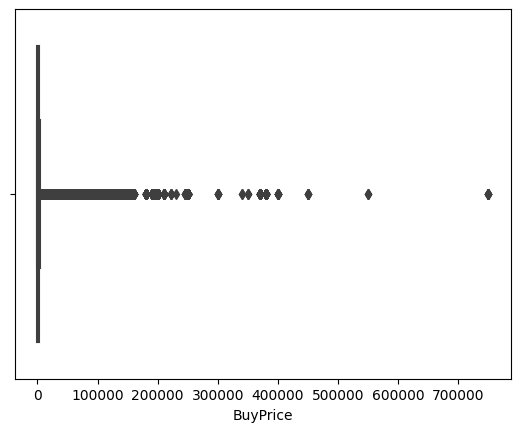

In [29]:
sns.boxplot(x='BuyPrice', data=df_normal)

<Axes: xlabel='BuyPrice'>

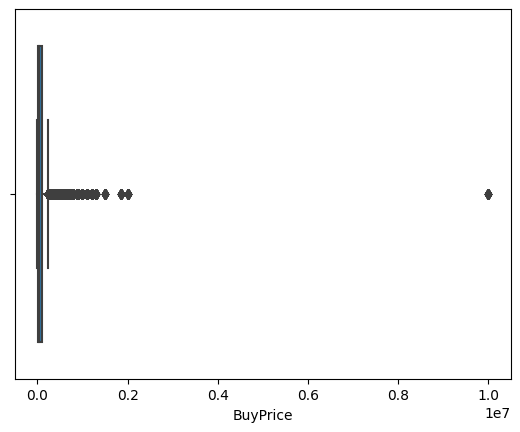

In [30]:
sns.boxplot(x='BuyPrice', data=df_class)

일단 Outlier가 존재하지만 그 차이가 굉장히 큰 것을 확인할 수 있다. 

일정 수치 이상의 데이터를 잘라내는 것을 통해 충분히 해결할 수 있을 것 같다.

BuyPrice를 기준으로 일반 각인은 400000 이상, 직업 각인은 2500000 이상을 threshold로 설정하여 제거한다.

In [31]:
condition = ((df_result['ClassEngrave']==0) & (df_result['BuyPrice'] <= 400000)) | ((df_result['ClassEngrave']==1) & (df_result['BuyPrice']<=2500000))
df_result = df_result[condition]

### 결과물 다시 확인

In [32]:
df_result.describe()

,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
count,2198125.00,2198125.00,2198125.00,2198125.00,2198125.00,2198125.00,2198125.00,2198125.00,2198125.00,2198125.00,2198125.00,2198125.00
mean,90.58,27010.97,1.84,313.43,131.15,2.13,4.85,2.99,0.30,19.54,11.58,3.04
std,4.59,60156.09,0.43,113.87,216.79,0.82,0.77,0.11,0.46,10.33,7.02,2.03
min,85.00,1.00,0.00,194.00,0.00,1.00,3.00,1.00,0.00,1.00,0.00,0.00
25%,87.00,100.00,2.00,198.00,0.00,1.00,4.00,3.00,0.00,20.00,5.00,1.00
50%,90.00,1000.00,2.00,294.00,0.00,2.00,5.00,3.00,0.00,24.00,12.00,3.00
75%,95.00,30000.00,2.00,476.00,477.00,3.00,5.00,3.00,1.00,27.00,18.00,5.00
max,100.00,2000000.00,2.00,500.00,500.00,6.00,6.00,3.00,1.00,30.00,23.00,6.00


In [33]:
df_normal = df_result[df_result['ClassEngrave']==0].reset_index()
df_class = df_result[df_result['ClassEngrave']==1].reset_index()

In [34]:
df_normal.describe()

,index,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
count,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00,1535991.00
mean,1105805.24,90.08,7987.07,1.89,330.36,165.76,2.14,4.70,3.00,0.00,19.56,11.58,3.04
std,640572.58,4.29,18713.74,0.36,119.73,231.54,0.82,0.73,0.08,0.00,10.31,7.02,2.03
min,51.00,85.00,1.00,0.00,194.00,0.00,1.00,3.00,1.00,0.00,1.00,0.00,0.00
25%,551254.50,87.00,100.00,2.00,198.00,0.00,1.00,4.00,3.00,0.00,20.00,5.00,1.00
50%,1104532.00,90.00,200.00,2.00,294.00,0.00,2.00,5.00,3.00,0.00,24.00,12.00,3.00
75%,1660079.50,93.00,2000.00,2.00,483.00,484.00,3.00,5.00,3.00,0.00,27.00,18.00,5.00
max,2217226.00,100.00,400000.00,2.00,500.00,500.00,6.00,6.00,3.00,0.00,30.00,23.00,6.00


In [35]:
df_class.describe()

,index,GradeQuality,BuyPrice,TradeAllowCount,FirstStatValue,SecondStatValue,PenaltyEngraveValue,FirstEngraveValue,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
count,662134.00,662134.00,662134.00,662134.00,662134.00,662134.00,662134.00,662134.00,662134.00,662134.00,662134.00,662134.00,662134.00
mean,1115120.98,91.74,71141.83,1.72,274.17,50.88,2.12,5.18,2.99,1.00,19.49,11.58,3.04
std,639109.14,5.05,91727.52,0.53,87.12,149.77,0.82,0.77,0.15,0.00,10.37,7.02,2.03
min,0.00,85.00,5.00,0.00,194.00,0.00,1.00,4.00,1.00,1.00,1.00,0.00,0.00
25%,561818.25,87.00,10000.00,2.00,197.00,0.00,1.00,5.00,3.00,1.00,4.00,5.00,1.00
50%,1117244.50,90.00,35000.00,2.00,292.00,0.00,2.00,5.00,3.00,1.00,24.00,12.00,3.00
75%,1669769.75,96.00,100000.00,2.00,298.00,0.00,3.00,6.00,3.00,1.00,27.00,18.00,5.00
max,2217243.00,100.00,2000000.00,2.00,500.00,500.00,3.00,6.00,3.00,1.00,30.00,23.00,6.00


<Axes: xlabel='BuyPrice'>

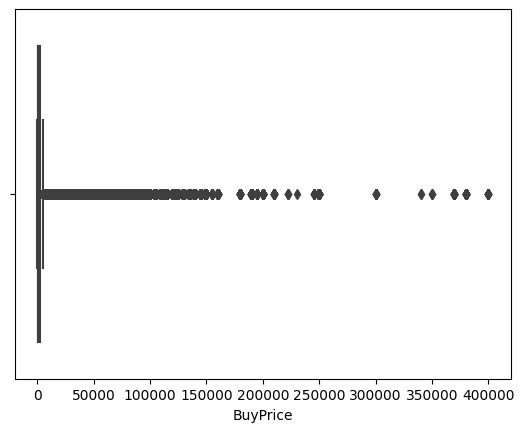

In [36]:
sns.boxplot(x='BuyPrice', data=df_normal)

In [37]:
df_result.to_csv('Full_Preprocessed_Data.csv', index=False)

### 완성된 데이터프레임을 이용해 추세 확인

In [39]:
normal_buyprice_grp_day_hour = df_normal.groupby(by=['Day', 'Hour'], as_index=False)['BuyPrice'].mean()
class_buyPrice_grp_day_hour = df_class.groupby(by=['Day', 'Hour'], as_index=False)['BuyPrice'].mean()

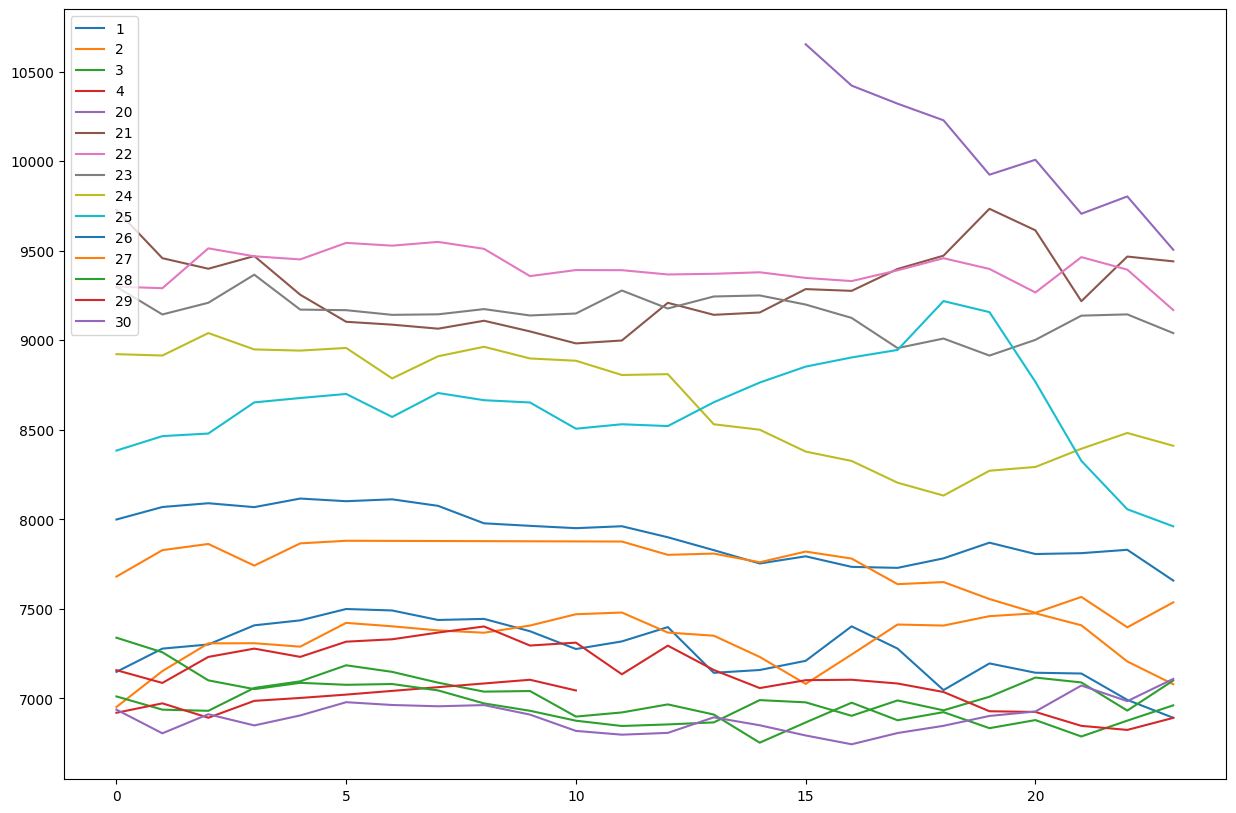

In [40]:
x = normal_buyprice_grp_day_hour['Hour'].unique()

fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in normal_buyprice_grp_day_hour['Day'].unique():
    x = normal_buyprice_grp_day_hour[normal_buyprice_grp_day_hour['Day']==day]['Hour'].unique()
    y = list(normal_buyprice_grp_day_hour[normal_buyprice_grp_day_hour['Day']==day]['BuyPrice'])
    sns.lineplot(x=x, y=y, label=day)
    plt.legend()

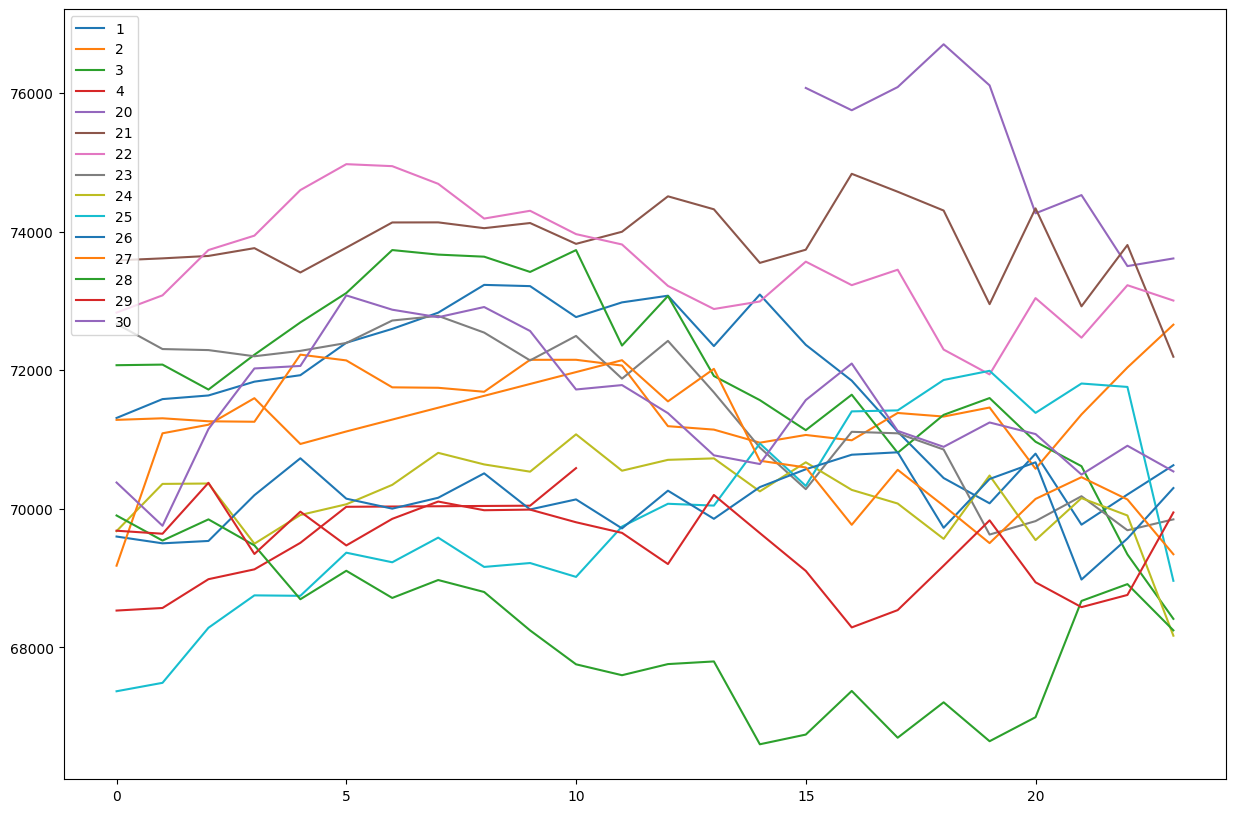

In [41]:
x = class_buyPrice_grp_day_hour['Hour'].unique()

fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in class_buyPrice_grp_day_hour['Day'].unique():
    x = class_buyPrice_grp_day_hour[class_buyPrice_grp_day_hour['Day']==day]['Hour'].unique()
    y = list(class_buyPrice_grp_day_hour[class_buyPrice_grp_day_hour['Day']==day]['BuyPrice'])
    sns.lineplot(x=x, y=y, label=day)
    plt.legend()

<Axes: ylabel='BuyPrice'>

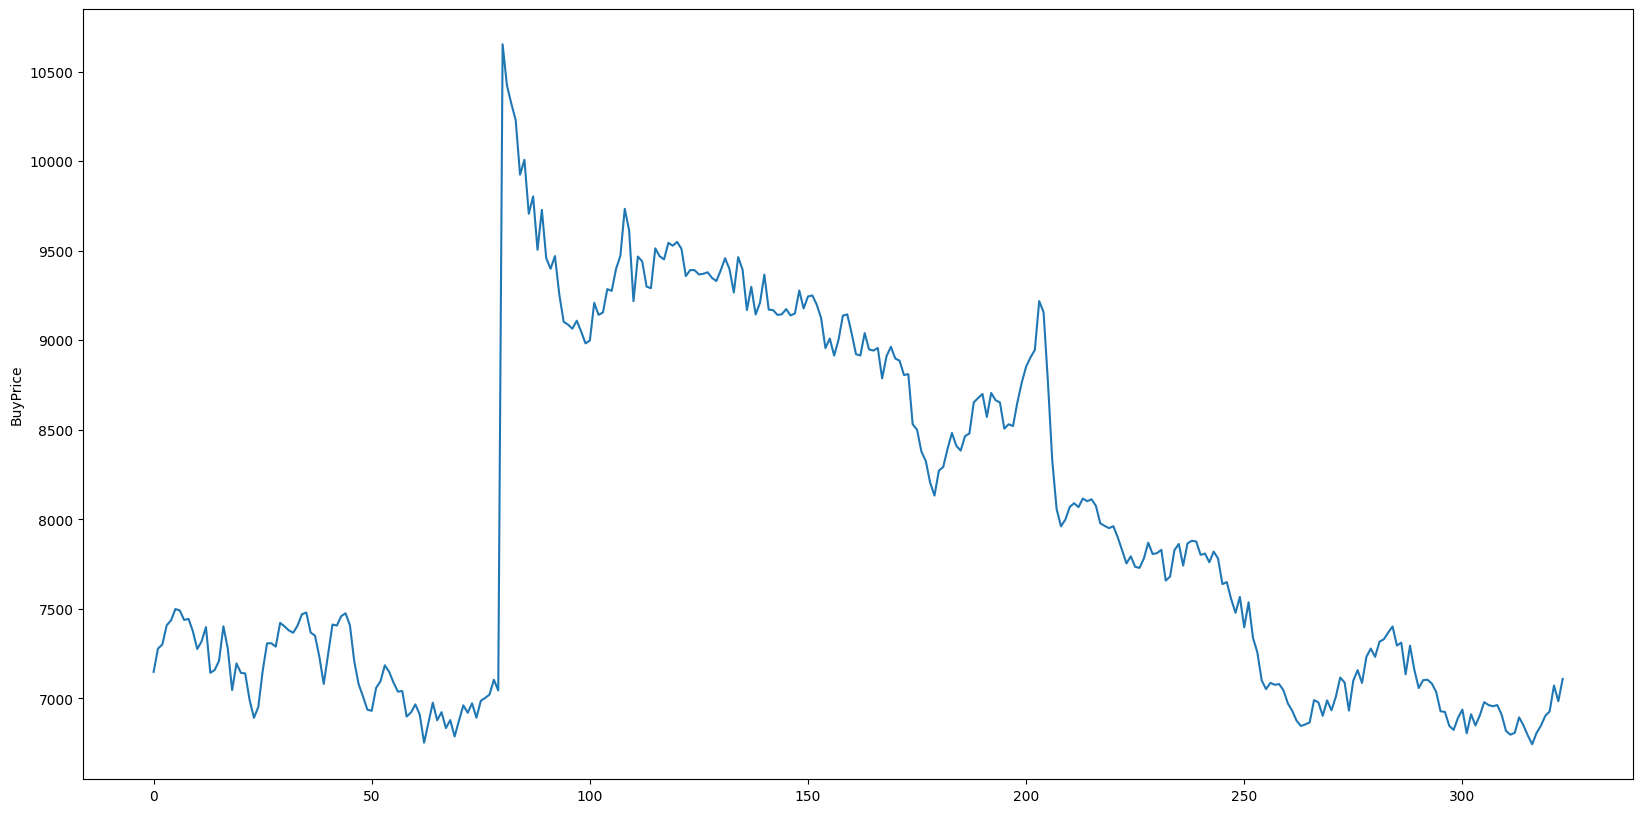

In [42]:
x = range(len(normal_buyprice_grp_day_hour))
y = normal_buyprice_grp_day_hour['BuyPrice']
fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('white')
sns.lineplot(x=x, y=y)

<Axes: ylabel='BuyPrice'>

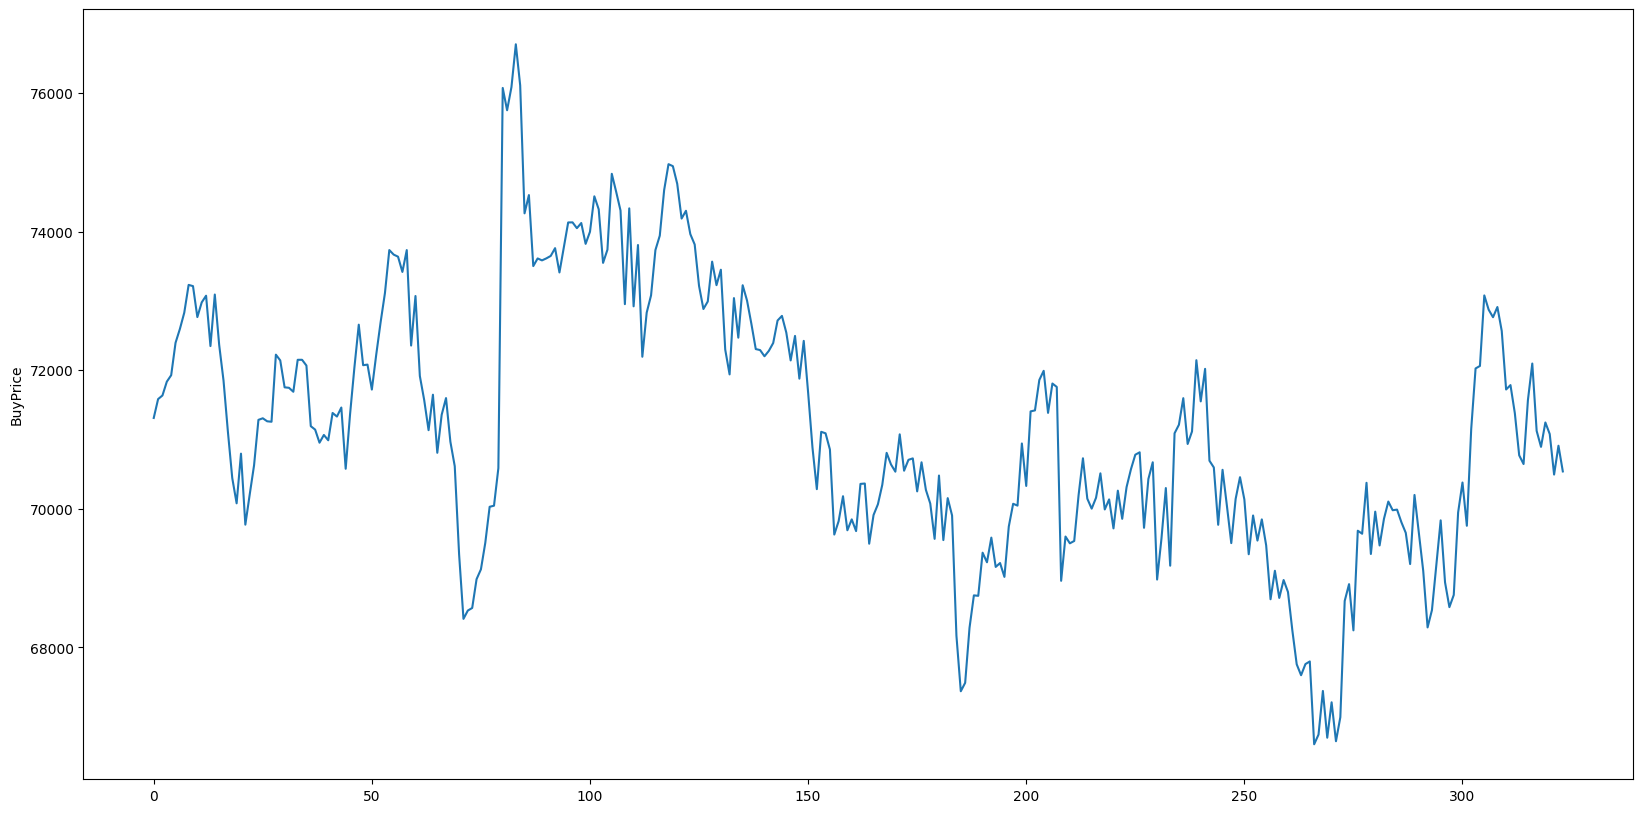

In [43]:
x = range(len(class_buyPrice_grp_day_hour))
y = class_buyPrice_grp_day_hour['BuyPrice']
fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('white')
sns.lineplot(x=x, y=y)

### 요일 단위 평균

In [44]:
normal_buyprice_grp_dow = df_normal.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()
class_buyPrice_grp_dow = df_class.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()

In [45]:
normal_buyprice_grp_dow

,Weekday,BuyPrice
0,0,7973.59
1,1,7436.14
2,2,8134.52
3,3,8154.69
4,4,8268.13
5,5,8020.91
6,6,7960.74


In [161]:
normal_buyprice_grp_dow.mean()

Weekday       3.00
BuyPrice   7992.68
dtype: float64

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

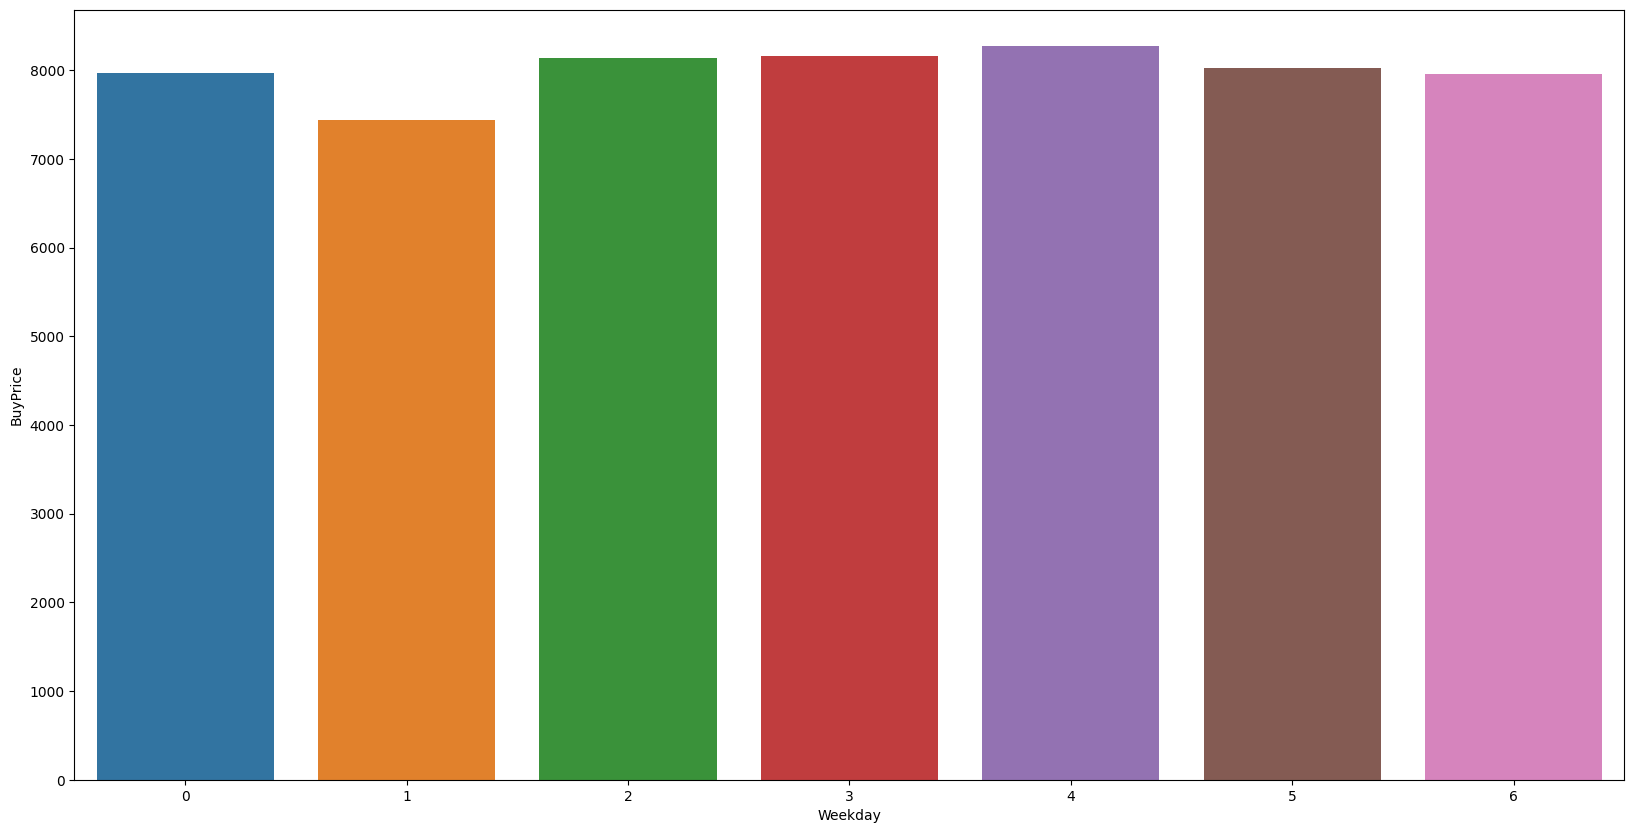

In [46]:
fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('white')
sns.barplot(x=normal_buyprice_grp_dow['Weekday'], y=normal_buyprice_grp_dow['BuyPrice'])

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

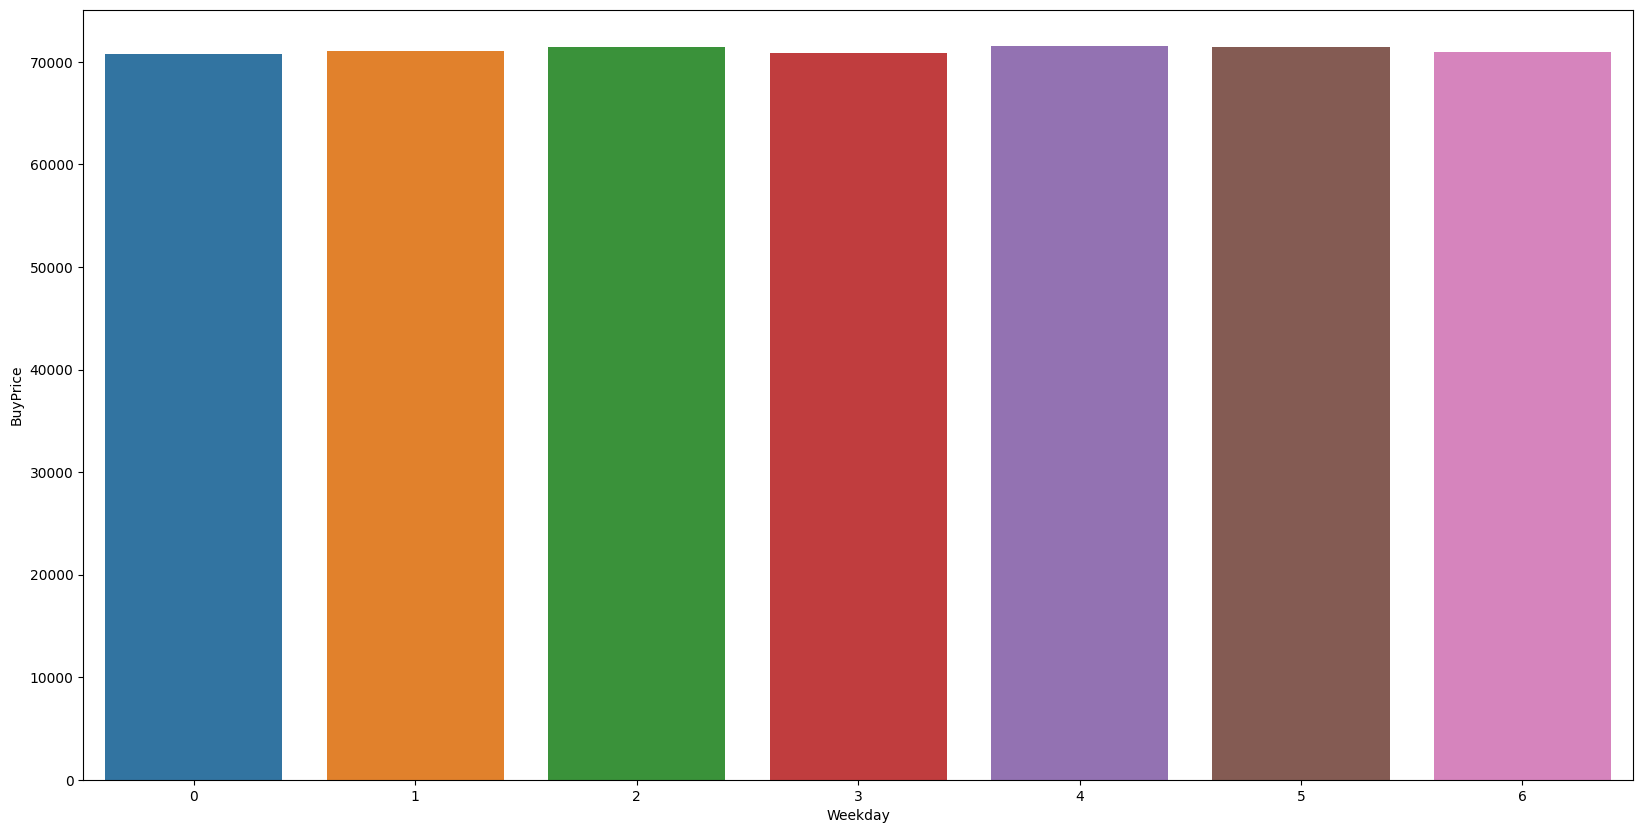

In [47]:
fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('white')
sns.barplot(x=class_buyPrice_grp_dow['Weekday'], y=class_buyPrice_grp_dow['BuyPrice'])

요일을 기준으로 평균낸 결과 기본 전제와 달리 전투 각인은 화요일이 제일 싸고, 직업 각인의 경우 요일에 따른 차이가 거의 없는 모습을 보여줬다.

### 요일 시간 기준 평균

In [48]:
normal_buyprice_grp_dow_hour = df_normal.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()
class_buyPrice_grp_dow_hour = df_class.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()

In [162]:
normal_buyprice_grp_dow_hour.head()

,Weekday,Hour,BuyPrice
0,0,0,7667.45
1,0,1,7807.47
2,0,2,7893.06
3,0,3,7978.08
4,0,4,7984.12


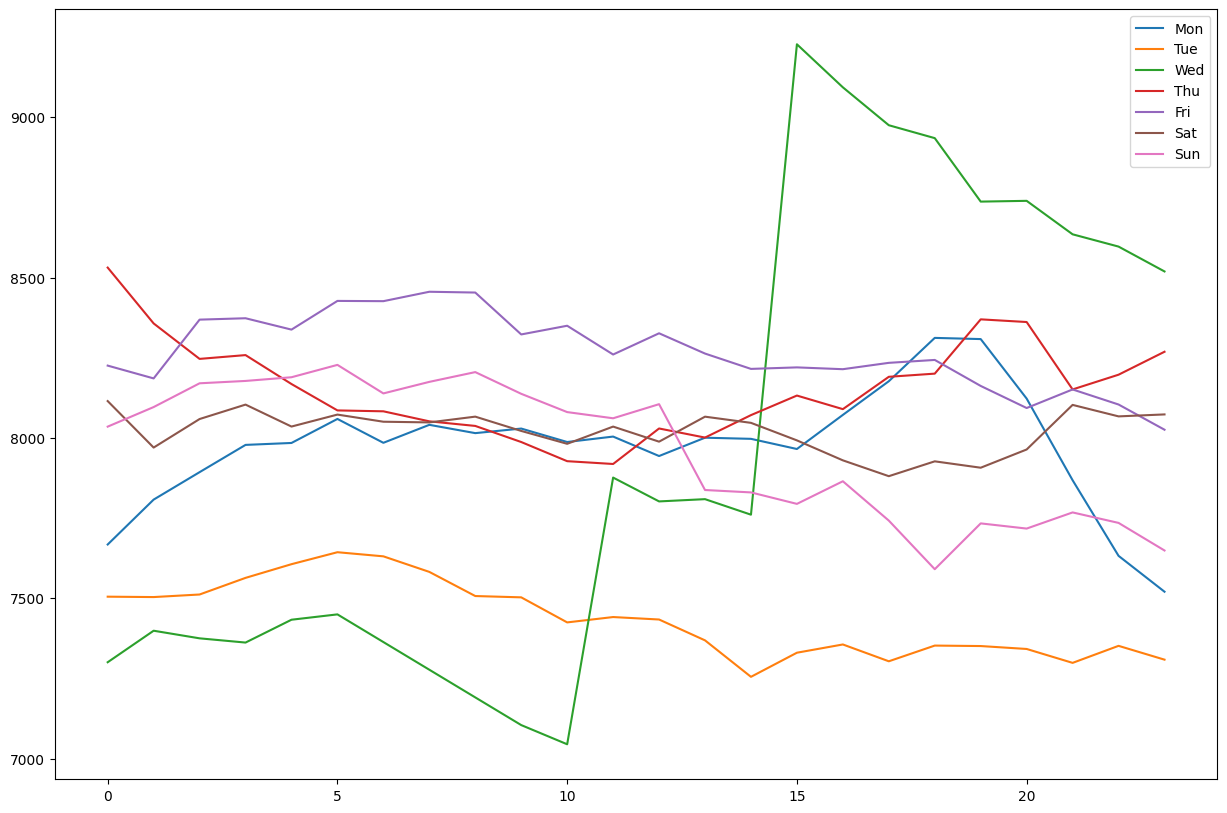

In [49]:
x = normal_buyprice_grp_dow_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in normal_buyprice_grp_dow_hour['Weekday'].unique():
    x = normal_buyprice_grp_dow_hour[normal_buyprice_grp_dow_hour['Weekday']==day]['Hour'].unique()
    y = list(normal_buyprice_grp_dow_hour[normal_buyprice_grp_dow_hour['Weekday']==day]['BuyPrice'])
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

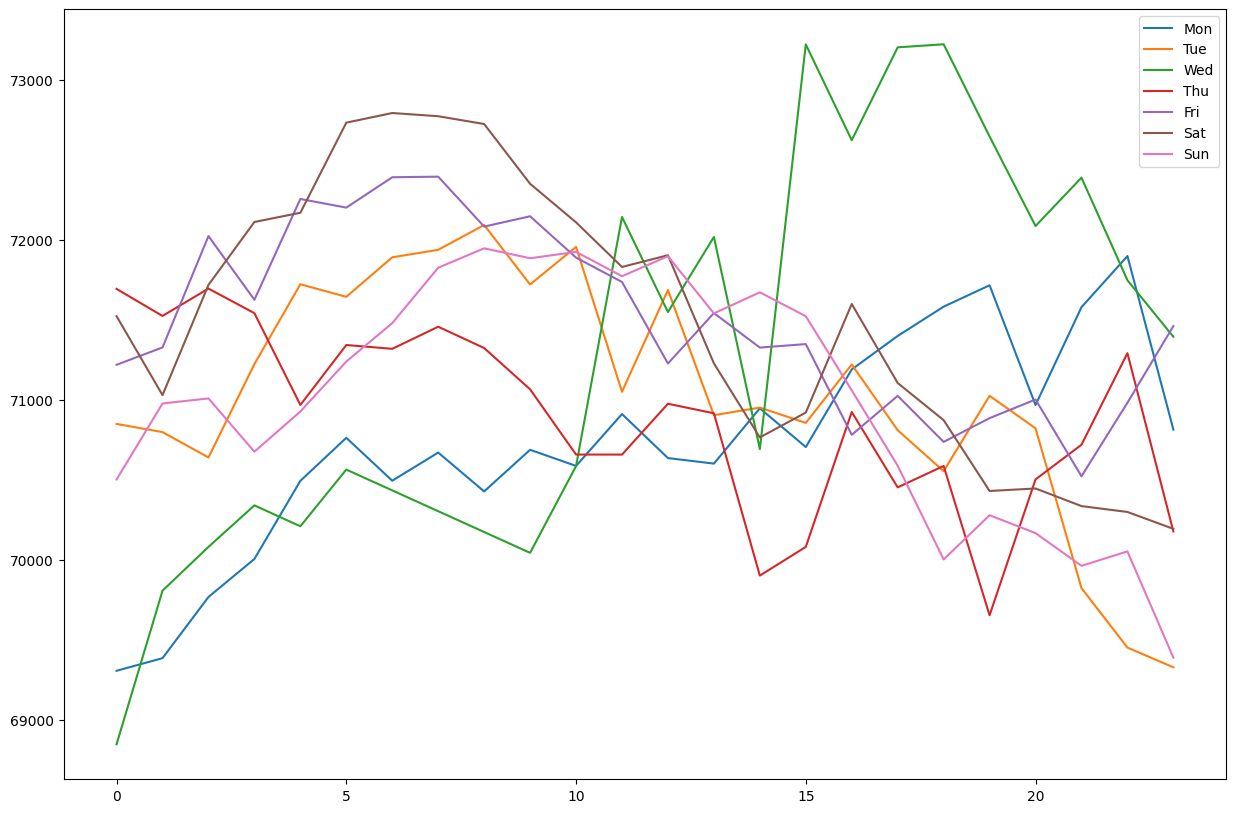

In [50]:
x = class_buyPrice_grp_dow_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in class_buyPrice_grp_dow_hour['Weekday'].unique():
    x = class_buyPrice_grp_dow_hour[class_buyPrice_grp_dow_hour['Weekday']==day]['Hour'].unique()
    y = list(class_buyPrice_grp_dow_hour[class_buyPrice_grp_dow_hour['Weekday']==day]['BuyPrice'])
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

### 메이저 각인과 마이너 각인 분류를 위한 채용 빈도 Feature 추가

In [130]:
engraves_without_class = engraves = {
    '전태': ['원한', '바리케이드', '안정된 상태', '예리한 둔기', '아드레날린'],
    '고기': ['원한', '슈퍼 차지', '고독한 기사', '결투의 대가', '저주받은 인형'],   
    '비기': ['원한', '예리한 둔기', '돌격대장', '질량 증가', '에테르 포식자'],   
    '광기': ['원한', '예리한 둔기', '돌격대장', '달인의 저력', '에테르 포식자'] ,      
    '중수': ['원한', '바리케이드', '정기 흡수', '결투의 대가'],     
    '분망': ['원한', '슈퍼 차지', '바리케이드', '결투의 대가', '아드레날린'],     
    '포식': ['원한', '기습의 대가', '돌격대장', '질량 증가', '아드레날린'],         
    '처단': ['원한', '기습의 대가', '돌격대장', '저주받은 인형', '아드레날린'],       
    '상소': ['원한', '예리한 둔기', '타격의 대가', '저주받은 인형', '아드레날린'],  
    '교감': ['원한', '예리한 둔기', '아드레날린', '돌격대장', '에테르 포식자'],    
    '황후': ['원한', '아드레날린', '저주받은 인형', '돌격대장', '타격의 대가'],    
    '황제': ['원한', '돌격대장', '질량 증가', '타격의 대가', '아드레날린'],      
    '점화': ['원한', '속전속결', '타격의 대가', '아드레날린', '에테르 포식자'],        
    '환류': ['원한', '예리한 둔기', '타격의 대가', '저주받은 인형', '아드레날린'],      
    '초심': ['원한', '예리한 둔기', '돌격대장', '질량 증가', '각성'],             
    '오의': ['원한', '예리한 둔기', '돌격대장', '저주받은 인형', '아드레날린'],     
    '체술': ['원한', '기습의 대가', '예리한 둔기', '돌격대장', '아드레날린'],     
    '충단': ['원한', '예리한 둔기', '기습의 대가', '저주받은 인형', '아드레날린'],   
    '세맥': ['원한', '예리한 둔기', '돌격대장', '질량 증가', '아드레날린'],        
    '역천': ['원한', '예리한 둔기', '저주받은 인형', '아드레날린', '각성'],        
    '절정': ['원한', '돌격대장', '기습의 대가', '저주받은 인형', '아드레날린'],        
    '절제': ['원한', '돌격대장', '기습의 대가', '저주받은 인형', '아드레날린'],        
    '일격': ['원한', '기습의 대가', '예리한 둔기', '저주받은 인형', '아드레날린'],    
    '난무': ['원한', '기습의 대가', '예리한 둔기', '저주받은 인형', '아드레날린'],    
    '강무': ['원한', '예리한 둔기', '저주받은 인형', '기습의 대가', '아드레날린'],   
    '핸건': ['원한', '저주받은 인형', '아드레날린', '정밀 단도', '에테르 포식자'],     
    '화강': ['원한', '예리한 둔기', '아드레날린', '타격의 대가', '에테르 포식자'],   
    '포강': ['원한', '예리한 둔기', '저주받은 인형', '속전속결', '아드레날린'],     
    '죽습': ['원한', '예리한 둔기', '저주받은 인형', '타격의 대가', '아드레날린'],  
    '두동': ['원한', '예리한 둔기', '돌격대장', '타격의 대가', '아드레날린'],    
    '유산': ['원한', '예리한 둔기', '바리케이드', '돌격대장', '아드레날린'],      
    '기술': ['원한', '예리한 둔기', '돌격대장', '질량 증가', '아드레날린'],   
    '피메': ['원한', '예리한 둔기', '저주받은 인형', '타격의 대가', '아드레날린'],   
    '사시': ['원한', '예리한 둔기', '타격의 대가', '저주받은 인형'],  
    '질풍': ['원한', '돌격대장', '타격의 대가', '아드레날린', '에테르 포식자'],      
    '슬비': ['원한', '아드레날린', '예리한 둔기', '타격의 대가', '에테르 포식자'],     
    '충동': ['원한', '예리한 둔기', '저주받은 인형', '돌격대장', '아드레날린'],
    '억제': ['원한', '돌격대장', '예리한 둔기', '저주받은 인형', '아드레날린'],    
    '달소': ['원한', '기습의 대가', '예리한 둔기', '저주받은 인형', '아드레날린',],  
    '갈증': ['원한', '돌격대장', '기습의 대가', '저주받은 인형', '아드레날린'],        
    '버스트': ['원한', '예리한 둔기', '저주받은 인형', '기습의 대가', '아드레날린'],    
    '잔재': ['원한', '슈퍼 차지', '기습의 대가', '저주받은 인형', '아드레날린'],   
    '만월': ['원한', '돌격대장', '예리한 둔기', '타격의 대가', '아드레날린'],    
    '그믐': ['원한', '예리한 둔기', '돌격대장', '아드레날린', '에테르 포식자'],    
    '축오': ['전문의', '급소 타격', '각성', '구슬동자'],           
    '심판자': ['원한', '기습의 대가', '돌격대장', '저주받은 인형', '아드레날린'],      
    '절구': ['각성', '전문의', '중갑 착용', '급소 타격', '폭발물 전문가'],       
    '진용': ['원한', '아드레날린', '예리한 둔기', '질량 증가', '돌격대장'],      
    '만개': ['전문의', '각성', '중갑 착용', '급소 타격', '위기 모면'],            
    '회귀': ['원한', '예리한 둔기', '돌격대장', '저주받은 인형', '아드레날린'],      
}

In [131]:
engrave_freq = dict()
for key, value in engraves_without_class.items():
    for v in value:
        if v in engrave_freq:
            engrave_freq[v] += 1
        else:
            engrave_freq[v] = 1

In [132]:
engrave_freq_df = pd.DataFrame.from_dict(data=engrave_freq, orient='index', columns=['Freq']).reset_index()

In [133]:
engrave_freq_df.sort_values(by='Freq', ascending=False, inplace=True)
engrave_freq_df.reset_index(drop=True, inplace=True)

In [134]:
engrave_freq_df

,index,Freq
0,원한,47
1,아드레날린,41
2,예리한 둔기,32
3,저주받은 인형,26
4,돌격대장,25
5,기습의 대가,14
6,타격의 대가,13
7,에테르 포식자,9
8,질량 증가,7
9,각성,5


<Axes: xlabel='Freq', ylabel='index'>

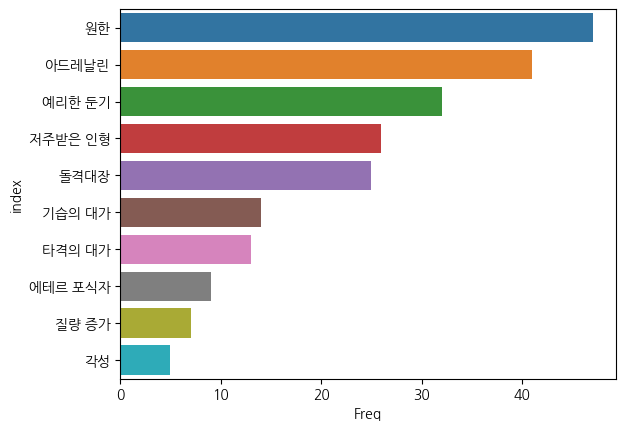

In [136]:
sns.barplot(x=engrave_freq_df['Freq'][:10], y=engrave_freq_df['index'][:10],)

<Axes: xlabel='Freq', ylabel='index'>

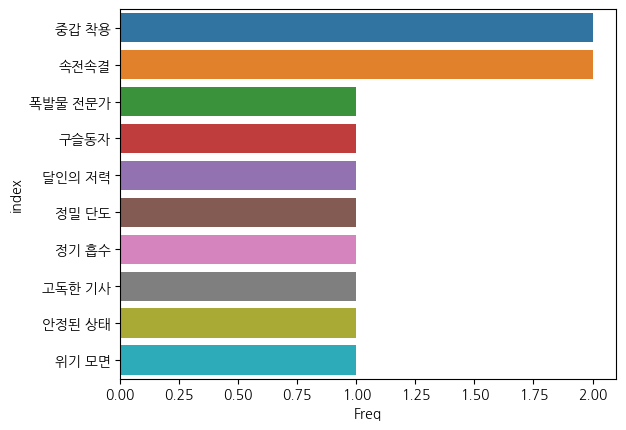

In [137]:
sns.barplot(x=engrave_freq_df['Freq'][-10:], y=engrave_freq_df['index'][-10:])

### 채용률 상위 5개 각인들과 그 외의 각인들의 평균 비교

직업 각인을 먼저 확인

In [139]:
cond = df_class['FirstEngraveName'].isin(engrave_freq_df['index'][:5]) | df_class['SecondEngraveName'].isin(engrave_freq_df['index'][:5])
df_class_top5 = df_class[cond]
df_class_etc = df_class[~cond]

In [140]:
class_top5_grp_weekday_hour = df_class_top5.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()
class_etc_grp_weekday_hour = df_class_etc.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()

In [164]:
class_top5_grp_weekday_hour['BuyPrice'].mean()

73784.51694758853

In [165]:
class_etc_grp_weekday_hour['BuyPrice'].mean()

65132.16921617353

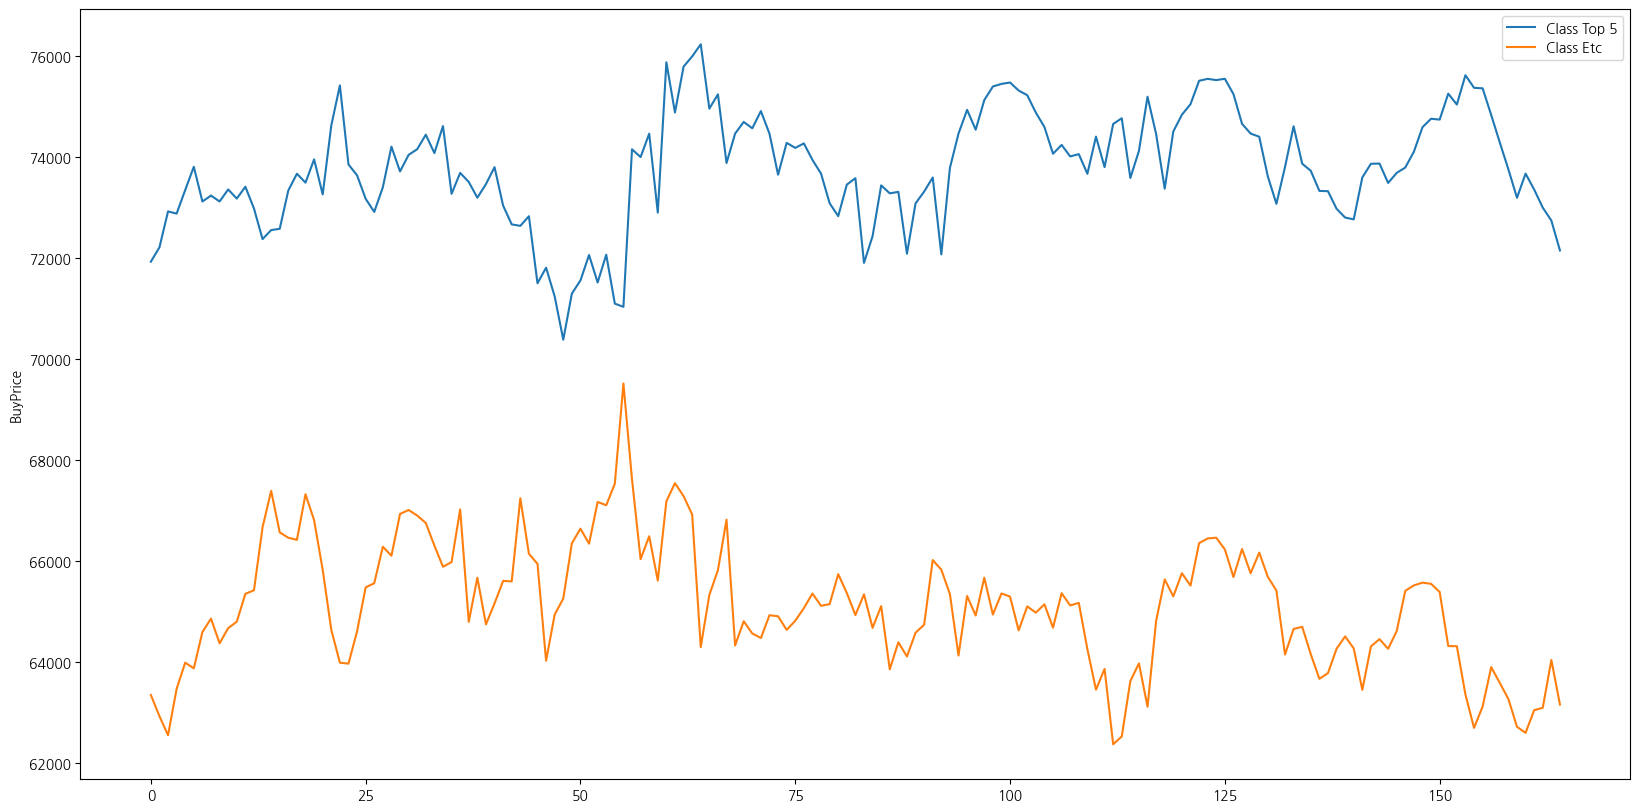

In [141]:
x1 = range(len(class_top5_grp_weekday_hour))
y1 = class_top5_grp_weekday_hour['BuyPrice']
x2 = range(len(class_etc_grp_weekday_hour))
y2 = class_etc_grp_weekday_hour['BuyPrice']

fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('white')
sns.lineplot(x=x1, y=y1, label='Class Top 5')
sns.lineplot(x=x2, y=y2, label='Class Etc')
plt.legend()

채용률이 높은 각인의 평균 가격이 높은 것을 확인할 수 있었다.

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

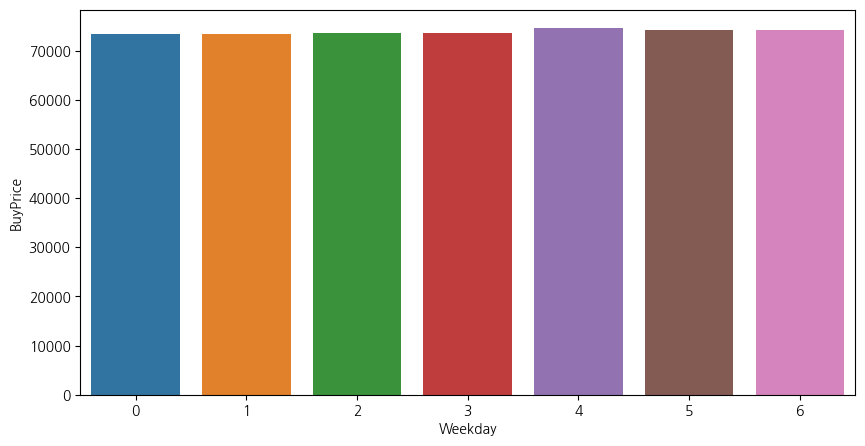

In [146]:
class_top5_grp_dow = df_class_top5.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()

fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')
sns.barplot(x=class_top5_grp_dow['Weekday'], y=class_top5_grp_dow['BuyPrice'])

In [168]:
class_top5_grp_dow

,Weekday,BuyPrice
0,0,73273.30
1,1,73290.63
2,2,73557.05
3,3,73498.20
4,4,74573.62
5,5,74201.35
6,6,74084.30


In [166]:
class_top5_grp_dow.mean()

Weekday        3.00
BuyPrice   73782.64
dtype: float64

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

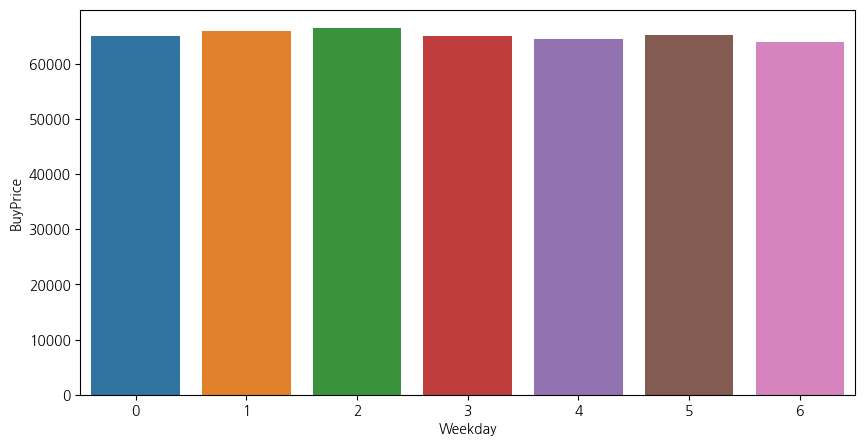

In [147]:
class_etc_grp_dow = df_class_etc.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()

fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')
sns.barplot(x=class_etc_grp_dow['Weekday'], y=class_etc_grp_dow['BuyPrice'])

In [169]:
class_etc_grp_dow

,Weekday,BuyPrice
0,0,65008.53
1,1,65865.75
2,2,66443.90
3,3,64942.80
4,4,64512.97
5,5,65232.24
6,6,63983.46


In [167]:
class_etc_grp_dow.mean()

Weekday        3.00
BuyPrice   65141.38
dtype: float64

In [170]:
class_top5_grp_dow['BuyPrice'] - class_etc_grp_dow['BuyPrice']

0    8264.77
1    7424.88
2    7113.15
3    8555.40
4   10060.65
5    8969.12
6   10100.84
Name: BuyPrice, dtype: float64

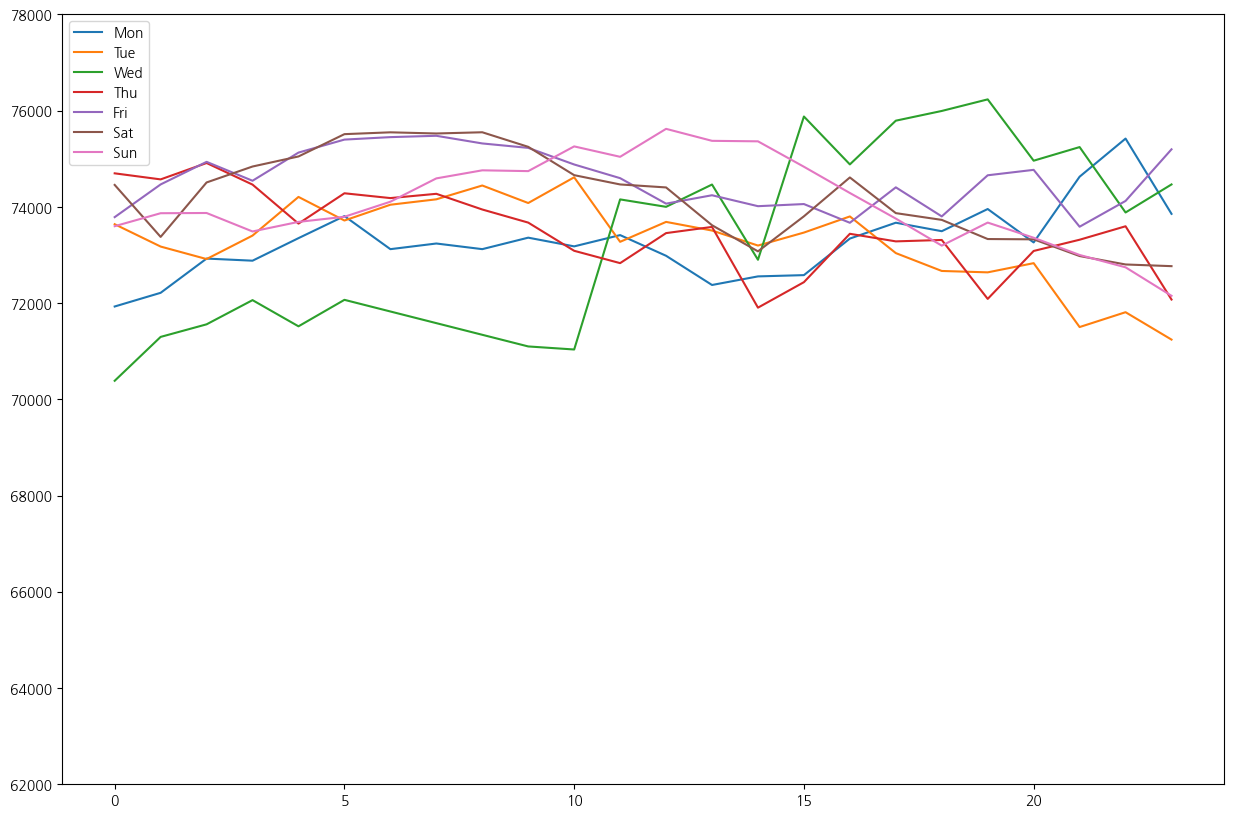

In [153]:
x = class_top5_grp_weekday_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in class_top5_grp_weekday_hour['Weekday'].unique():
    x = class_top5_grp_weekday_hour[class_top5_grp_weekday_hour['Weekday']==day]['Hour'].unique()
    y = list(class_top5_grp_weekday_hour[class_top5_grp_weekday_hour['Weekday']==day]['BuyPrice'])
    plt.ylim(62000, 78000)
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

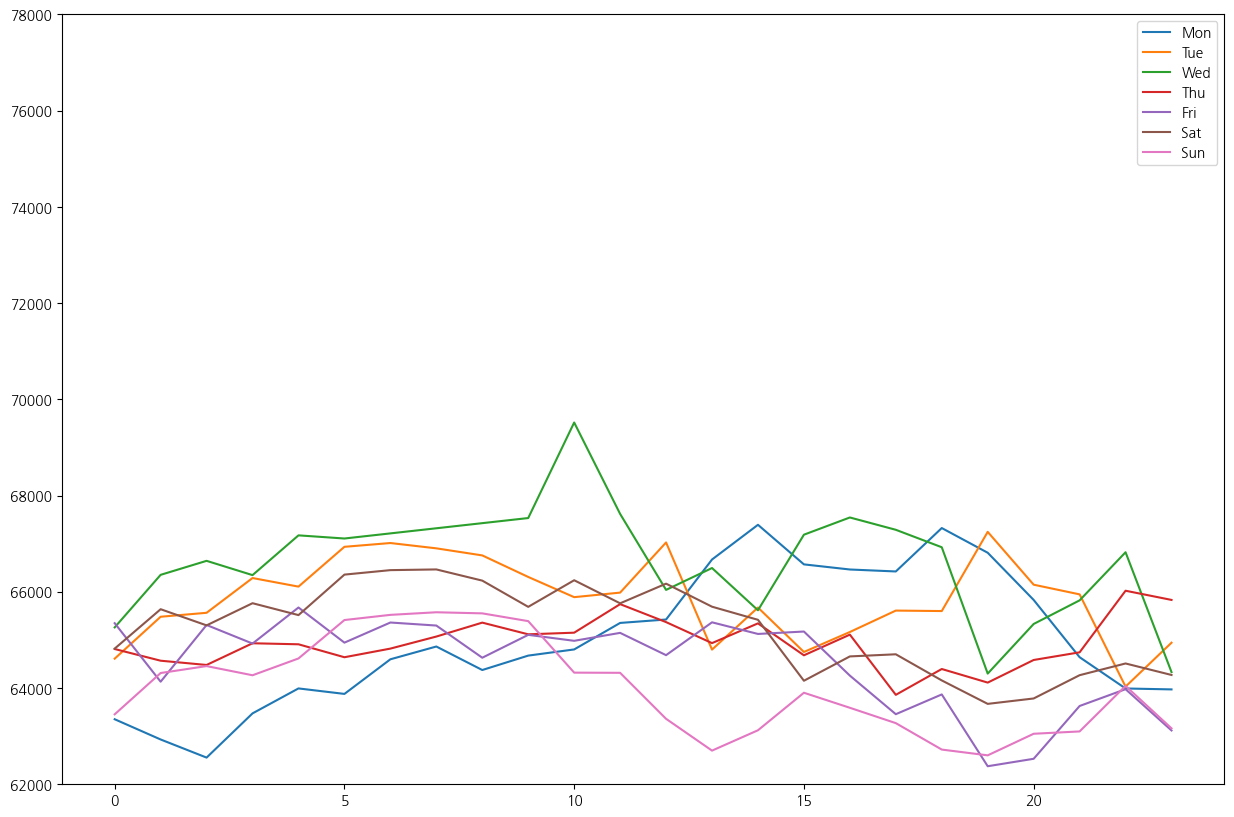

In [154]:
x = class_etc_grp_weekday_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in class_etc_grp_weekday_hour['Weekday'].unique():
    x = class_etc_grp_weekday_hour[class_etc_grp_weekday_hour['Weekday']==day]['Hour'].unique()
    y = list(class_etc_grp_weekday_hour[class_etc_grp_weekday_hour['Weekday']==day]['BuyPrice'])
    plt.ylim(62000, 78000)
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

일반 각인에 대해서도 같은 프로세스로 확인

In [143]:
cond = df_normal['FirstEngraveName'].isin(engrave_freq_df['index'][:5]) | df_normal['SecondEngraveName'].isin(engrave_freq_df['index'][:5])
df_normal_top5 = df_normal[cond]
df_normal_etc = df_normal[~cond]

In [144]:
normal_top5_grp_weekday_hour = df_normal_top5.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()
normal_etc_grp_weekday_hour = df_normal_etc.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()

In [173]:
normal_top5_grp_weekday_hour['BuyPrice'].mean()

7885.676381369652

In [174]:
normal_etc_grp_weekday_hour['BuyPrice'].mean()

8511.56891751324

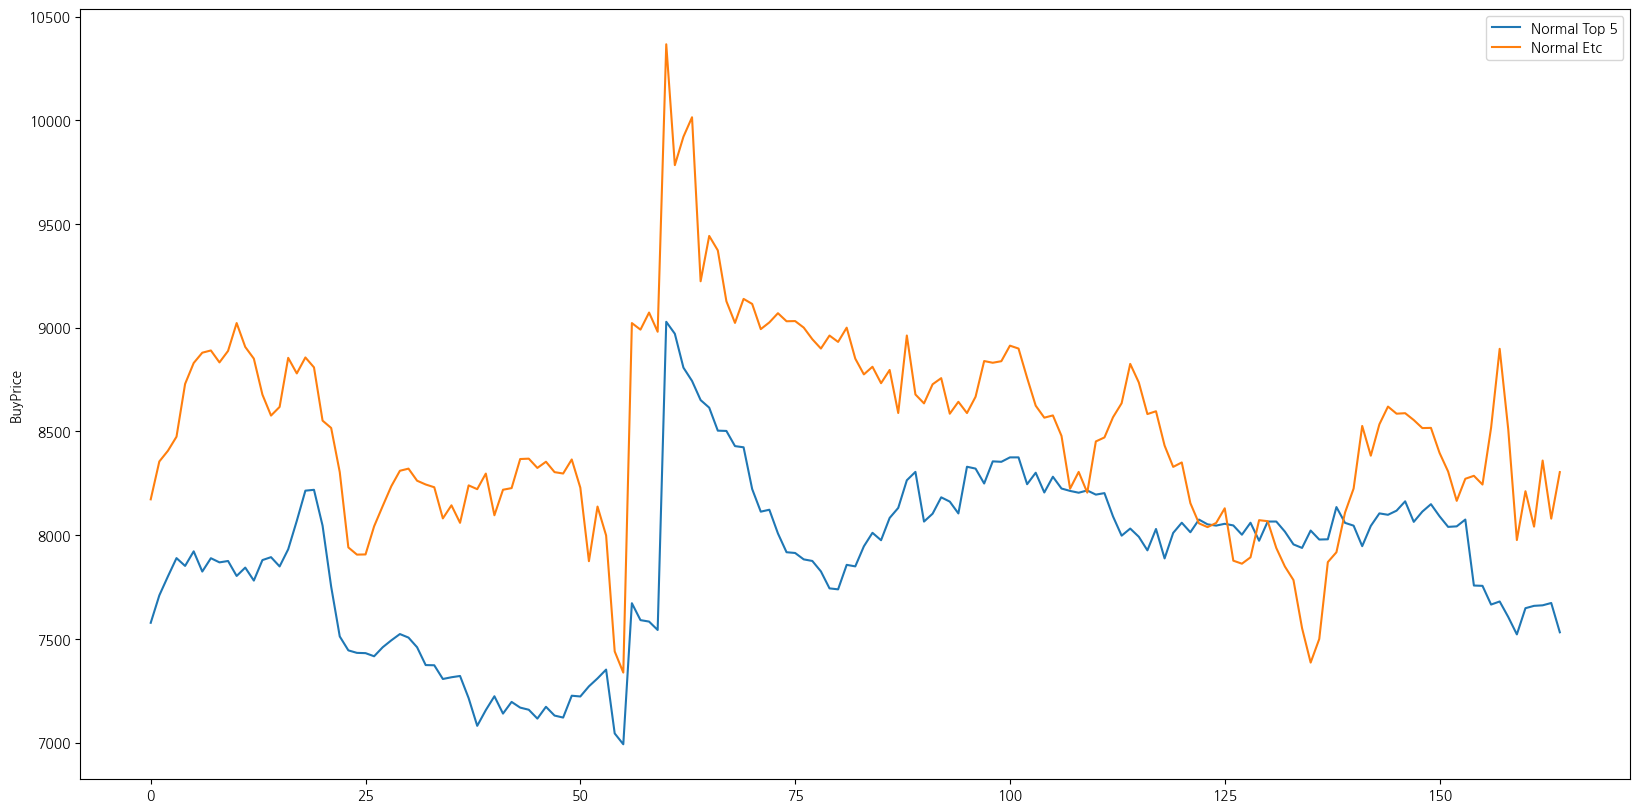

In [145]:
x1 = range(len(normal_top5_grp_weekday_hour))
y1 = normal_top5_grp_weekday_hour['BuyPrice']
x2 = range(len(normal_etc_grp_weekday_hour))
y2 = normal_etc_grp_weekday_hour['BuyPrice']

fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('white')
sns.lineplot(x=x1, y=y1, label='Normal Top 5')
sns.lineplot(x=x2, y=y2, label='Normal Etc')
plt.legend()

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

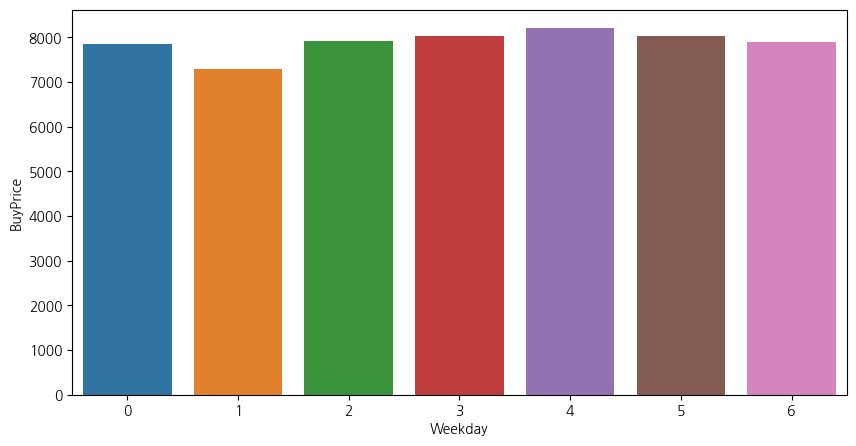

In [148]:
normal_top5_grp_dow = normal_top5_grp_weekday_hour.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()

fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')
sns.barplot(x=normal_top5_grp_dow['Weekday'], y=normal_top5_grp_dow['BuyPrice'])

In [175]:
normal_top5_grp_dow

,Weekday,BuyPrice
0,0,7852.25
1,1,7298.88
2,2,7913.47
3,3,8023.69
4,4,8206.64
5,5,8024.26
6,6,7884.02


In [176]:
normal_top5_grp_dow.mean()

Weekday       3.00
BuyPrice   7886.17
dtype: float64

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

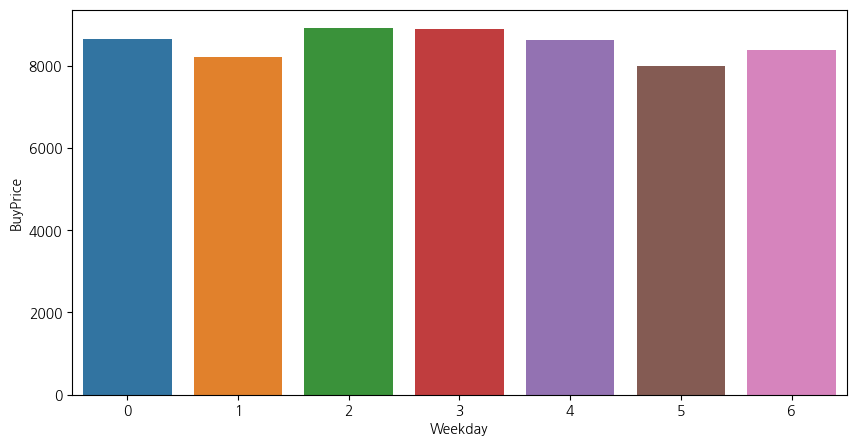

In [149]:
normal_etc_grp_dow = df_normal_etc.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()

fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')
sns.barplot(x=normal_etc_grp_dow['Weekday'], y=normal_etc_grp_dow['BuyPrice'])

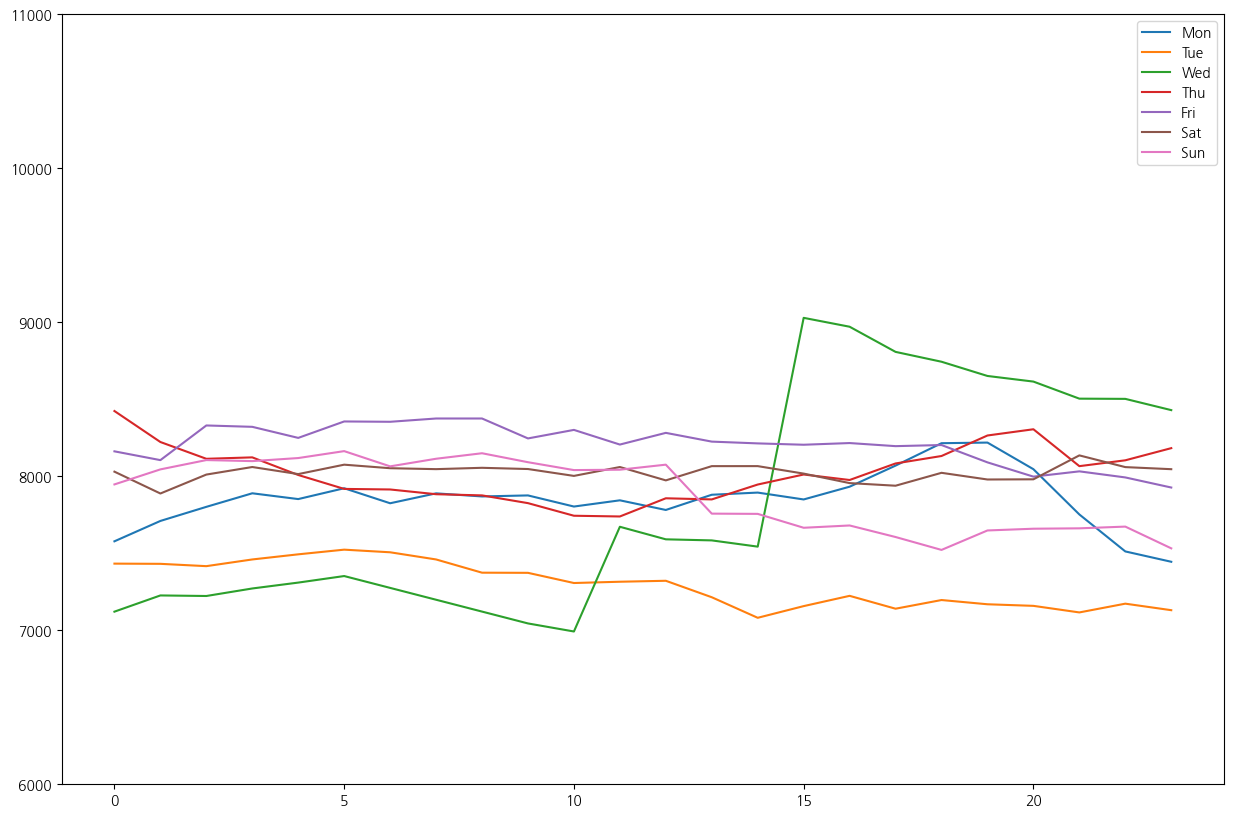

In [159]:
x = normal_top5_grp_weekday_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in normal_top5_grp_weekday_hour['Weekday'].unique():
    x = normal_top5_grp_weekday_hour[normal_top5_grp_weekday_hour['Weekday']==day]['Hour'].unique()
    y = list(normal_top5_grp_weekday_hour[normal_top5_grp_weekday_hour['Weekday']==day]['BuyPrice'])
    plt.ylim(6000, 11000)
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

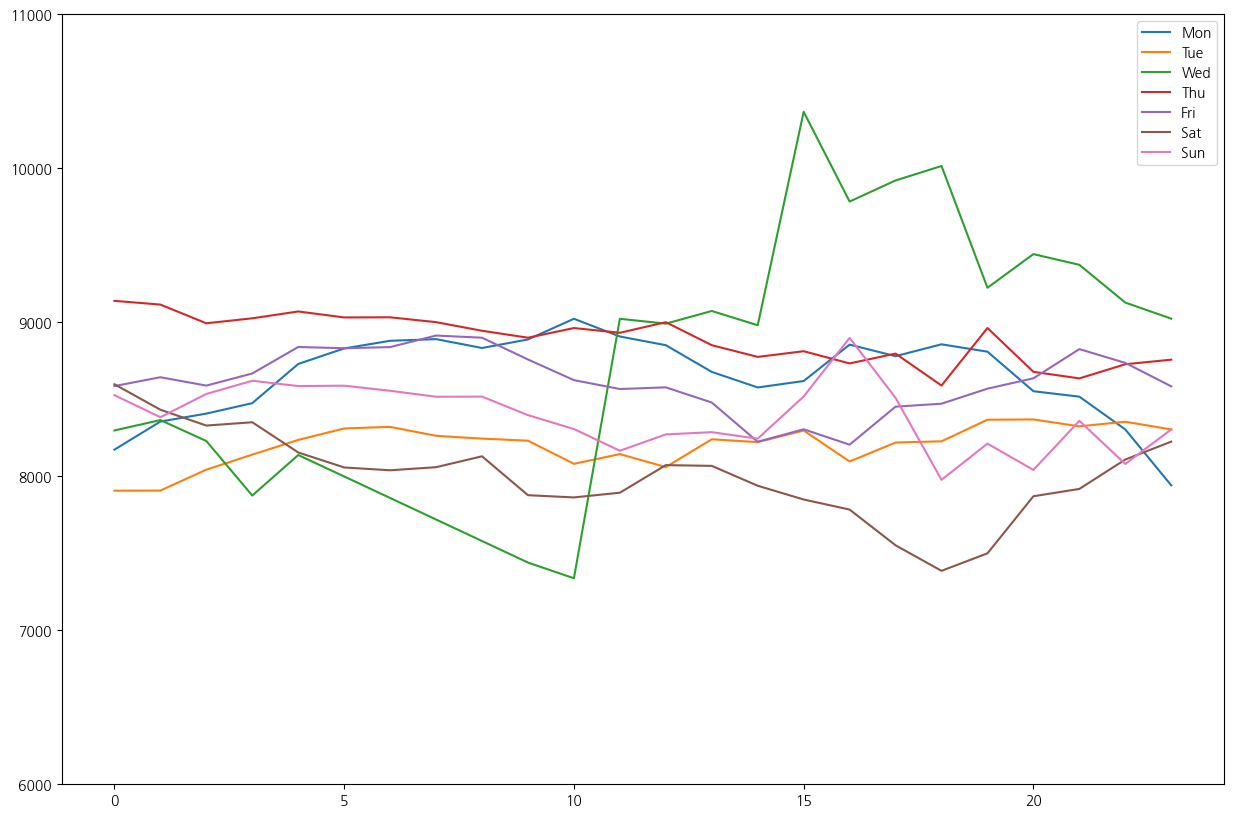

In [160]:
x = normal_etc_grp_weekday_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in normal_etc_grp_weekday_hour['Weekday'].unique():
    x = normal_etc_grp_weekday_hour[normal_etc_grp_weekday_hour['Weekday']==day]['Hour'].unique()
    y = list(normal_etc_grp_weekday_hour[normal_etc_grp_weekday_hour['Weekday']==day]['BuyPrice'])
    plt.ylim(6000, 11000)
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

결과적으로 대부분의 그래프에서 점검 직후인 수요일 오전 10시에 가격이 급격하게 올라간 후에 점점 내려가다가 주말부터 안정화되다가 점검 바로 전인 화요일에 최저점을 찍는 것으로 보인다.

### 인구수 기준 상위 5캐릭터, 하위 5캐릭터 직업 각인 가격 비교

참고
- 인원 통계는 로아와 참조
- 아이템 레벨은 1540 ~
- 딜러 기준으로 5 캐릭터 씩 분리
- 서포터는 따로 3캐릭터 집계
- 단순히 캐릭터 인구 수가 아닌 각인 선택 인구 수를 기준으로 한다.

10월 12일 기준
- 워로드
  - 전투 태세: 60,170
  - 고독한 기사: 41,806
- 디스트로이어
  - 분노의 망치: 41,988
  - 중력 수련: 11,039
- 슬레이어
  - 포식자: 44,561
  - 처단자: 25,424
- 버서커
  - 광기: 29,072
  - 비기: 3,725
- 기공사
  - 세맥타통: 13,236
  - 역천지체: 13,137
- 배틀마스터
  - 오의 강화: 24,234
  - 초심: 17,725
- 스트라이커
  - 오의난무: 33,678
  - 일격필살: 20,775
- 인파이터
  - 극의: 체술: 32,323
  - 충격 단련: 18,025
- 창술사
  - 절정: 49,660
  - 절제: 17,311
- 건슬링어
  - 피스메이커: 85,522
  - 사냥의 시간: 14,597
- 데빌헌터
  - 강화 무기: 15,954
  - 핸드거너: 15,276
- 블래스터
  - 포격 강화: 21,165
  - 화력 강화: 10,825
- 스카우터
  - 진화의 유산: 35,710
  - 아르데타인의 기술: 8,570
- 호크아이
  - 두 번째 동료: 15,368
  - 죽음의 습격: 15,172
- 서머너
  - 상급 소환사: 37,883
  - 넘치는 교감: 14,541
- 소서리스
  - 점화: 55,858
  - 환류: 26,719
- 아르카나
  - 황후의 은총: 25,897
  - 황제의 칙령: 16,183
- 데모닉
  - 멈출 수 없는 충동: 36,326
  - 완벽한 억제: 7,382
- 리퍼
  - 갈증: 24,936
  - 달의 소리: 14,916
- 블레이드
  - 버스트: 35,969
  - 잔재된 기운: 32,776
- 소울이터
  - 만월의 집행자: 37,307
  - 그믐의 경계: 34,646
- 기상술사
  - 질풍노도: 68,293
  - 이슬비: 30,178

인구 수 상위 5 각인
- 피스메이커 (85,522)
- 질풍노도 (68,293)
- 전투 태세 (60,170)
- 점화 (55,858)
- 절정 (49,660)

인구 수 하위 5 각인
- 비기 (3,725)
- 완벽한 억제 (7,382)
- 아르데타인의 기술 (8,570)
- 화력 강화 (10,825)
- 중력 수련 (11,039)

서포터
- 절실한 구원 (106,986)
- 만개 (104,473)
- 축복의 오라 (59,708)

상위 5 각인 확인

In [109]:
top5_class = ['피스메이커','질풍노도','전투 태세','점화','절정']

cond = df_class['FirstEngraveName'].isin(top5_class) | df_class['SecondEngraveName'].isin(top5_class)
df_class_top5 = df_class[cond]

In [110]:
df_class_top5.head()

,index,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
277,520,2023-09-20 15:18:00,목걸이,92,70000.00,2,특화,488,치명,496,공격속도 감소,3,점화,5,아드레날린,3,1,20,15,2
278,521,2023-09-20 15:18:00,목걸이,90,70000.00,2,특화,483,치명,498,이동속도 감소,3,점화,5,아드레날린,3,1,20,15,2
279,522,2023-09-20 15:18:00,귀걸이,85,1000.00,2,특화,291,-,0,이동속도 감소,1,점화,5,아드레날린,3,1,20,15,2
280,523,2023-09-20 15:18:00,귀걸이,85,1500.00,2,특화,291,-,0,공격속도 감소,1,점화,4,아드레날린,3,1,20,15,2
281,524,2023-09-20 15:18:00,귀걸이,88,2000.00,1,특화,293,-,0,공격력 감소,3,점화,4,아드레날린,3,1,20,15,2


In [111]:
bot5_class = ['비기','완벽한 억제','아르데타인의 기술','화력 강화','중력 수련']

cond = df_class['FirstEngraveName'].isin(bot5_class) | df_class['SecondEngraveName'].isin(bot5_class)
df_class_bot5 = df_class[cond]

In [112]:
df_class_bot5.head()

,index,Date,EquipType,GradeQuality,BuyPrice,TradeAllowCount,FirstStatName,FirstStatValue,SecondStatName,SecondStatValue,PenaltyEngraveName,PenaltyEngraveValue,FirstEngraveName,FirstEngraveValue,SecondEngraveName,SecondEngraveValue,ClassEngrave,Day,Hour,Weekday
9,9,2023-09-20 15:18:00,귀걸이,86,1500.00,2,치명,292,-,0,공격속도 감소,2,화력 강화,5,아드레날린,3,1,20,15,2
10,10,2023-09-20 15:18:00,귀걸이,90,150000.00,2,치명,294,-,0,이동속도 감소,2,아드레날린,4,화력 강화,3,1,20,15,2
11,11,2023-09-20 15:18:00,귀걸이,100,300000.00,2,치명,300,-,0,공격속도 감소,3,아드레날린,4,화력 강화,3,1,20,15,2
12,12,2023-09-20 15:18:00,귀걸이,100,400000.00,2,치명,300,-,0,방어력 감소,1,아드레날린,6,화력 강화,3,1,20,15,2
13,13,2023-09-20 15:18:00,반지,95,9000.00,2,치명,198,-,0,방어력 감소,1,화력 강화,5,아드레날린,3,1,20,15,2


In [113]:
class_top5_grp_weekday_hour = df_class_top5.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()
class_bot5_grp_weekday_hour = df_class_bot5.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()

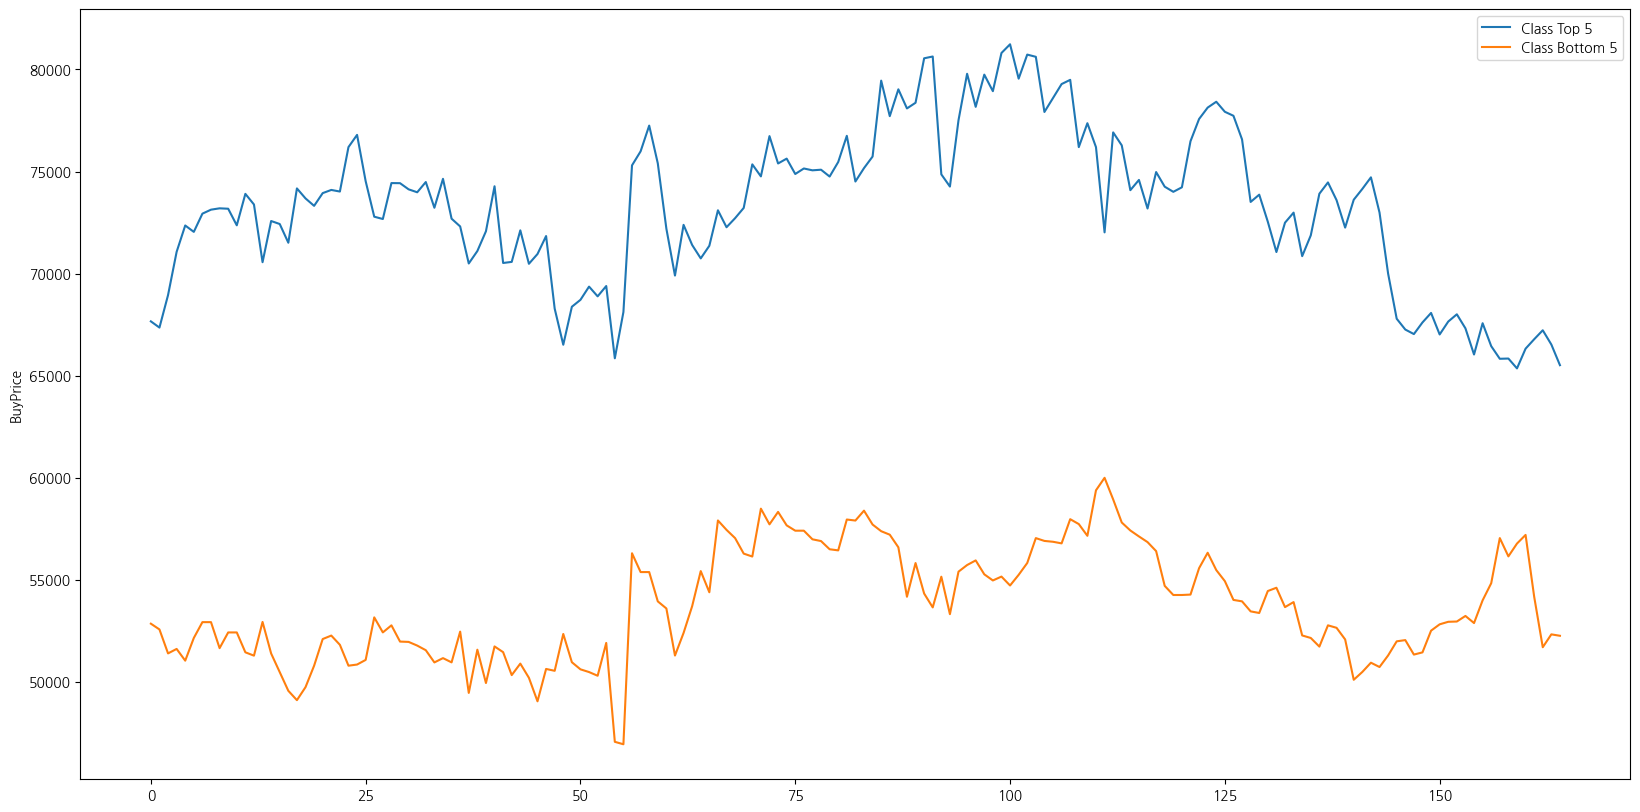

In [114]:
x1 = range(len(class_top5_grp_weekday_hour))
y1 = class_top5_grp_weekday_hour['BuyPrice']
x2 = range(len(class_bot5_grp_weekday_hour))
y2 = class_bot5_grp_weekday_hour['BuyPrice']

fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('white')
sns.lineplot(x=x1, y=y1, label='Class Top 5')
sns.lineplot(x=x2, y=y2, label='Class Bottom 5')
plt.legend()

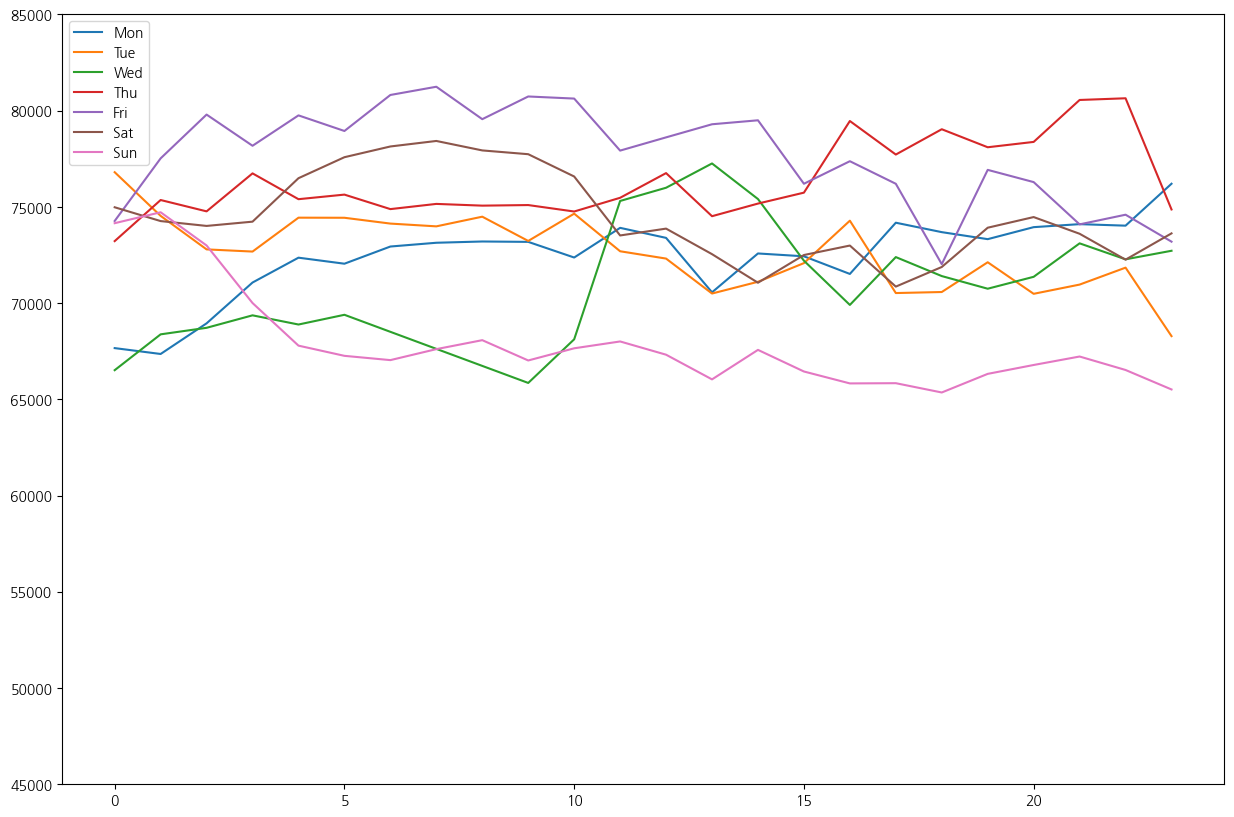

In [120]:
x = class_top5_grp_weekday_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in class_top5_grp_weekday_hour['Weekday'].unique():
    x = class_top5_grp_weekday_hour[class_top5_grp_weekday_hour['Weekday']==day]['Hour'].unique()
    y = list(class_top5_grp_weekday_hour[class_top5_grp_weekday_hour['Weekday']==day]['BuyPrice'])
    plt.ylim(45000, 85000)
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

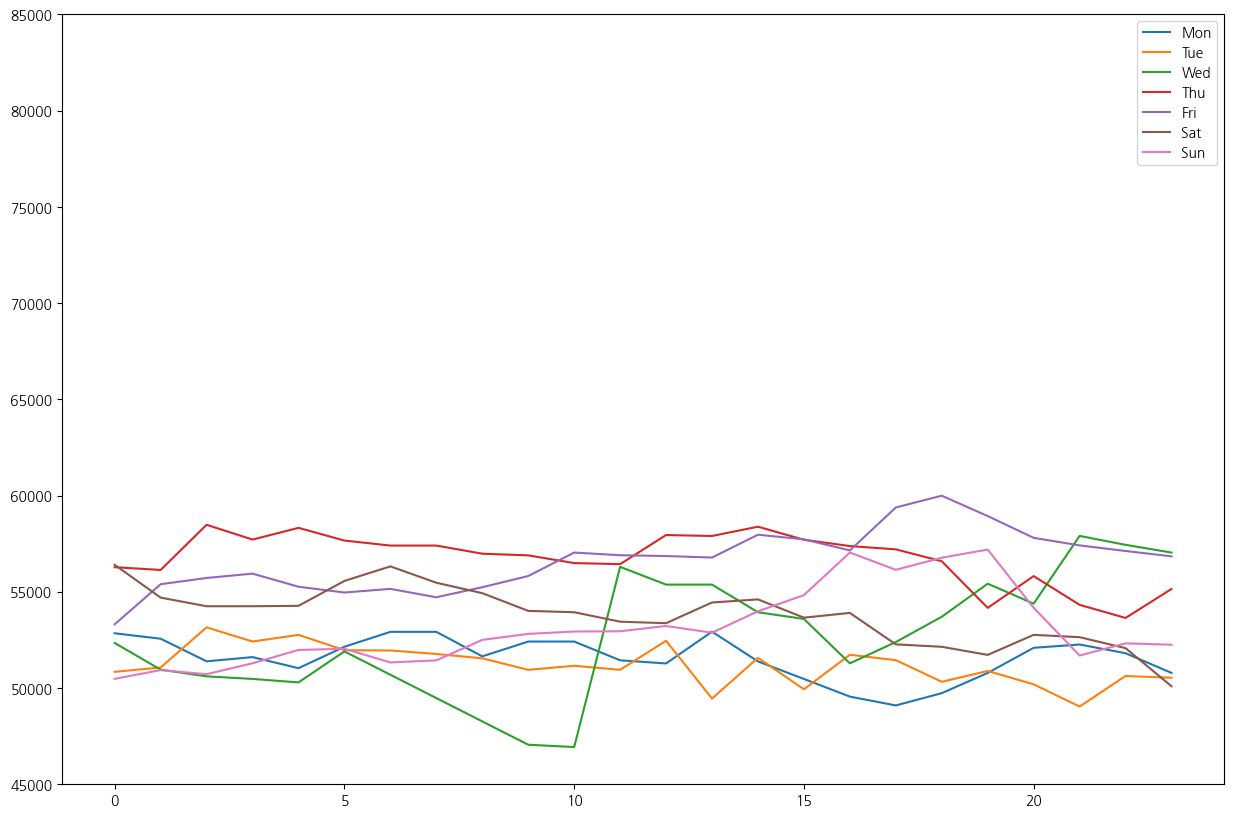

In [121]:
x = class_bot5_grp_weekday_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in class_bot5_grp_weekday_hour['Weekday'].unique():
    x = class_bot5_grp_weekday_hour[class_bot5_grp_weekday_hour['Weekday']==day]['Hour'].unique()
    y = list(class_bot5_grp_weekday_hour[class_bot5_grp_weekday_hour['Weekday']==day]['BuyPrice'])
    plt.ylim(45000, 85000)
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

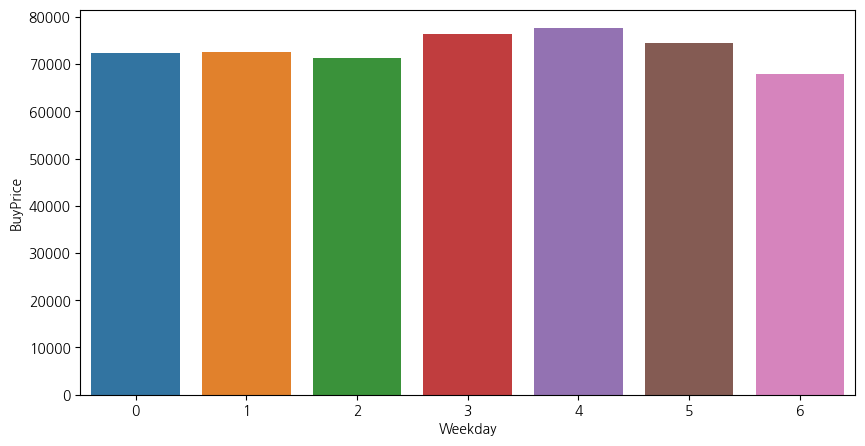

In [122]:
class_top5_grp_dow = class_top5_grp_weekday_hour.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()

fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')
sns.barplot(x=class_top5_grp_dow['Weekday'], y=class_top5_grp_dow['BuyPrice'])

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

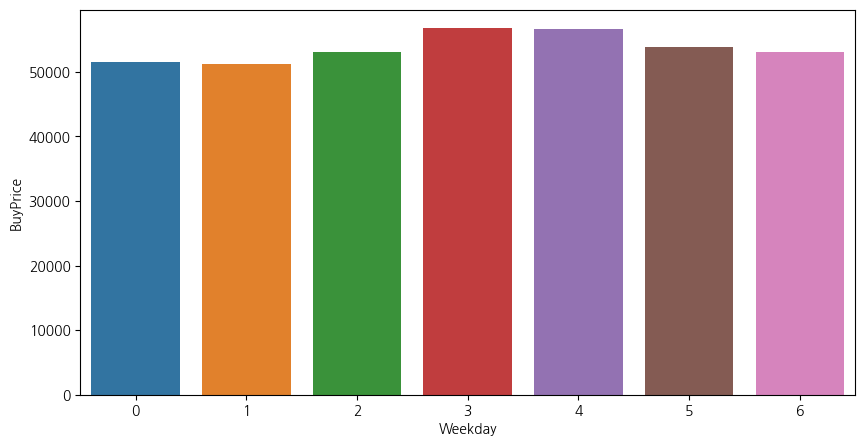

In [123]:
class_bot5_grp_dow = class_bot5_grp_weekday_hour.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()

fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')
sns.barplot(x=class_bot5_grp_dow['Weekday'], y=class_bot5_grp_dow['BuyPrice'])

In [124]:
support_class = ['절실한 구원','축복의 오라','만개']

cond = df_class['FirstEngraveName'].isin(support_class) | df_class['SecondEngraveName'].isin(support_class)
df_class_support = df_class[cond]

In [125]:
class_support_grp_weekday_hour = df_class_support.groupby(by=['Weekday', 'Hour'], as_index=False)['BuyPrice'].mean()

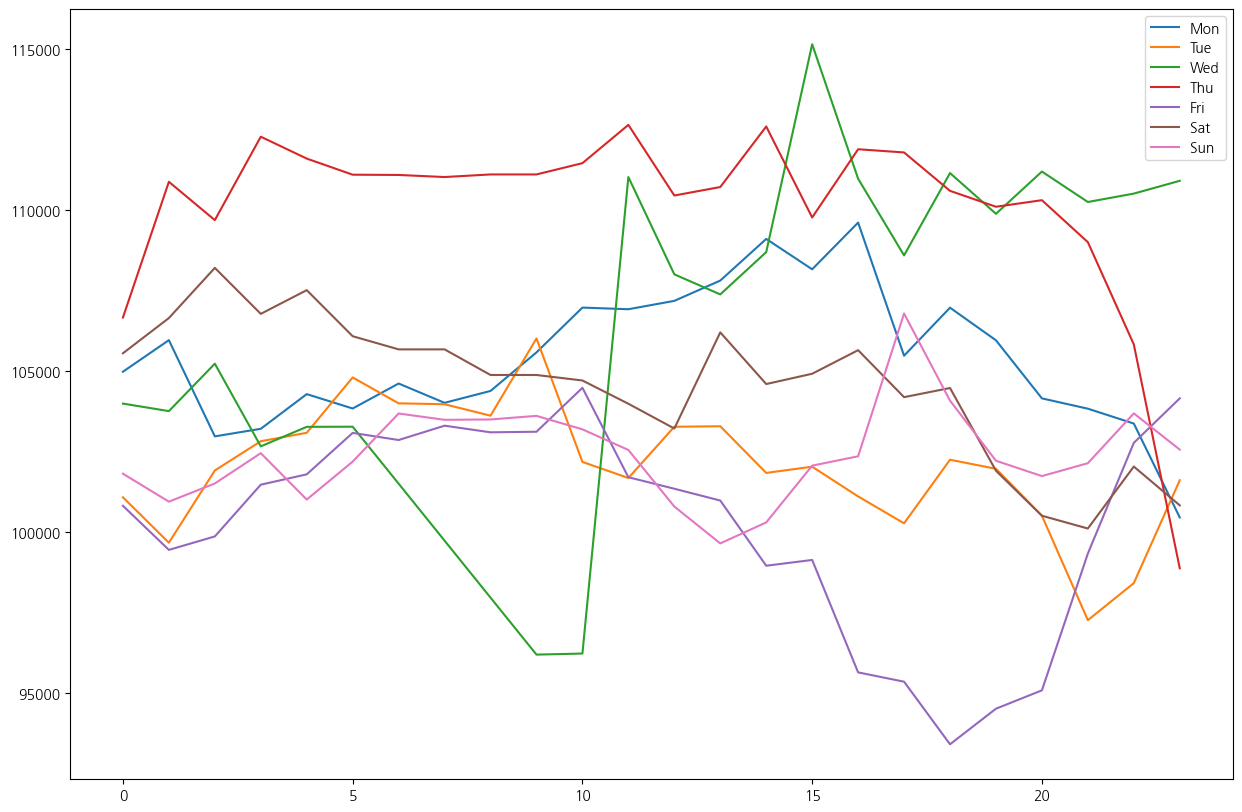

In [128]:
x = class_support_grp_weekday_hour['Hour'].unique()
day_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
for day in class_support_grp_weekday_hour['Weekday'].unique():
    x = class_support_grp_weekday_hour[class_support_grp_weekday_hour['Weekday']==day]['Hour'].unique()
    y = list(class_support_grp_weekday_hour[class_support_grp_weekday_hour['Weekday']==day]['BuyPrice'])
    sns.lineplot(x=x, y=y, label=day_dict[day])
    plt.legend()

<Axes: xlabel='Weekday', ylabel='BuyPrice'>

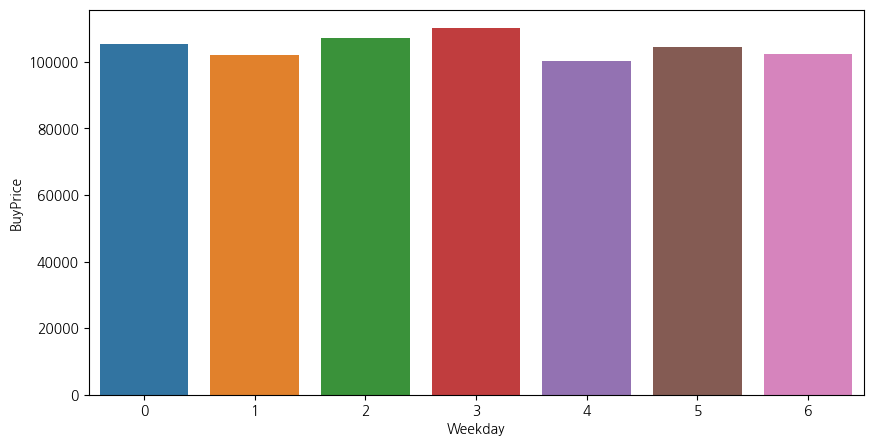

In [129]:
class_support_grp_dow = class_support_grp_weekday_hour.groupby(by=['Weekday'], as_index=False)['BuyPrice'].mean()

fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')
sns.barplot(x=class_support_grp_dow['Weekday'], y=class_support_grp_dow['BuyPrice'])